Código Geral

In [102]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import ast
from collections import Counter
from pandas import DataFrame

sns.set_theme()


start_year = 2013
end_year = 2023

movies_data_by_year = {}


In [103]:
def get_file_path(year):
    data_common_name = 'prepared_data/tmdb_dump'
    return f'{data_common_name}-{year}.csv'

def read_data_set(year):
    file_path = get_file_path(year)
    return pd.read_csv(file_path, encoding='utf-8', lineterminator='\n')

In [104]:
for year in range(start_year, end_year+1):
    data = read_data_set(year)
    data["release_date"] = pd.to_datetime(data["release_date"])
    data['year'] = data['release_date'].dt.year
    movies_data_by_year[year] = data
    if 'all' in movies_data_by_year:
        movies_data_by_year['all'] = pd.concat([movies_data_by_year['all'], data])
    else:
        movies_data_by_year['all'] = data

Análise dos Dados numéricos (Quantidade e Média)

In [110]:
def movies_count(year):
    df =  movies_data_by_year[year]
    return len(df.index)

def budget_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'budget'].mean()

def revenue_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'revenue'].mean()

def runtime_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'runtime'].mean()

def vote_count_mean(year):
    df: DataFrame = movies_data_by_year[year]
    return df.loc[:, 'vote_count'].mean()

def vote_mean_by_year(year):
    df: DataFrame = movies_data_by_year[year]
    return vote_mean(df)

def vote_mean(df):
    weight = df["vote_count"]
    terms = weight * df["vote_average"]
    return terms.sum() / df["vote_count"].sum()
    
def vote_deviation(df):
    mean = vote_mean(df)
    weight = df["vote_count"]   
    df["deviation"] = ((df["vote_average"] - mean)**2) * weight
    
    upper_eq_part = df["deviation"].sum()
    
    weight_sum = weight.sum()
    n = weight[weight != 0].count()
    bottom_eq_part = weight_sum * (n - 1) / n
    
    return math.sqrt(upper_eq_part/bottom_eq_part)

Calculo do desvio padrão amostral dos dados numéricos

In [111]:
df_concat = movies_data_by_year[start_year]
for year in range(start_year+1, end_year+1):
    df_concat = pd.concat([df_concat, movies_data_by_year[year]])
    
numeric_columns = ["budget", "revenue", "runtime", "vote_count"]
print(df_concat[numeric_columns].std())
print("Deviation: ", vote_deviation(df_concat))


budget        5.017739e+07
revenue       2.170027e+08
runtime       2.108704e+01
vote_count    3.689888e+03
dtype: float64
0
Deviation:  0.7286371651706611


In [112]:
for year in range(start_year, end_year+1):
    values = year, movies_count(year), budget_mean(year), revenue_mean(year), runtime_mean(year), vote_count_mean(year), vote_mean_by_year(year)
    for value in values:
        print("{:.2f}".format(value), " & " , end="")
    print("")
    
movies = movies_data_by_year['all']
movies[movies.duplicated(keep='last')]



2013.00  & 330.00  & 29303094.60  & 84494262.40  & 111.97  & 2372.05  & 6.79  & 
2014.00  & 314.00  & 27957622.18  & 89641096.38  & 109.75  & 2648.03  & 7.01  & 
2015.00  & 298.00  & 28644129.90  & 97031834.21  & 111.99  & 2429.60  & 6.81  & 
2016.00  & 338.00  & 30994672.34  & 92910089.53  & 112.04  & 2470.69  & 6.83  & 
2017.00  & 304.00  & 29986882.77  & 104869605.15  & 112.58  & 2613.95  & 6.96  & 
2018.00  & 272.00  & 30722275.32  & 110836926.46  & 112.61  & 2359.91  & 7.00  & 
2019.00  & 251.00  & 32862991.07  & 119087300.21  & 111.95  & 2376.76  & 7.14  & 
2020.00  & 131.00  & 26146797.60  & 39878272.18  & 106.04  & 1548.56  & 7.04  & 
2021.00  & 157.00  & 45572795.15  & 94433473.81  & 115.19  & 2137.90  & 7.21  & 
2022.00  & 173.00  & 39368203.98  & 105105561.14  & 115.13  & 1499.87  & 7.11  & 
2023.00  & 205.00  & 45161701.40  & 107470294.39  & 117.77  & 1106.56  & 7.14  & 


Empty DataFrame
Columns: [id, original_language, original_title, overview, release_date, title, vote_average, vote_count, belongs_to_collection, budget, genres, production_companies, production_countries, revenue, runtime, spoken_languages, tagline, cast, crew, keywords, year]
Index: []

[0 rows x 21 columns]

# Histograma Variáveis numéricas

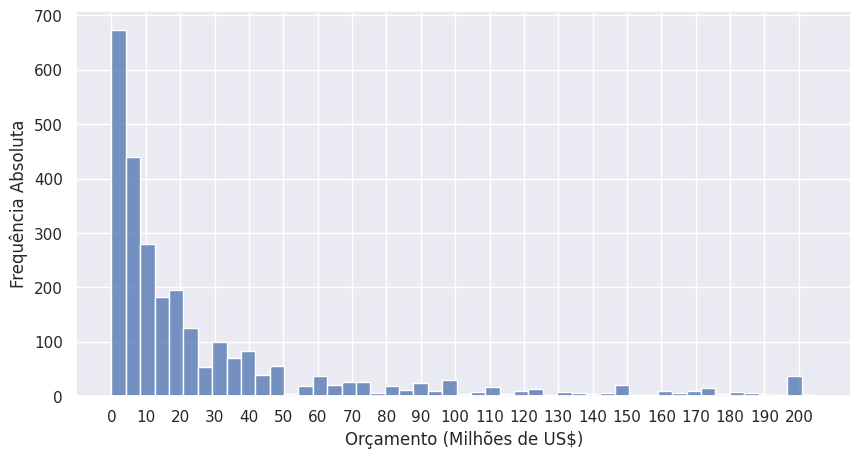

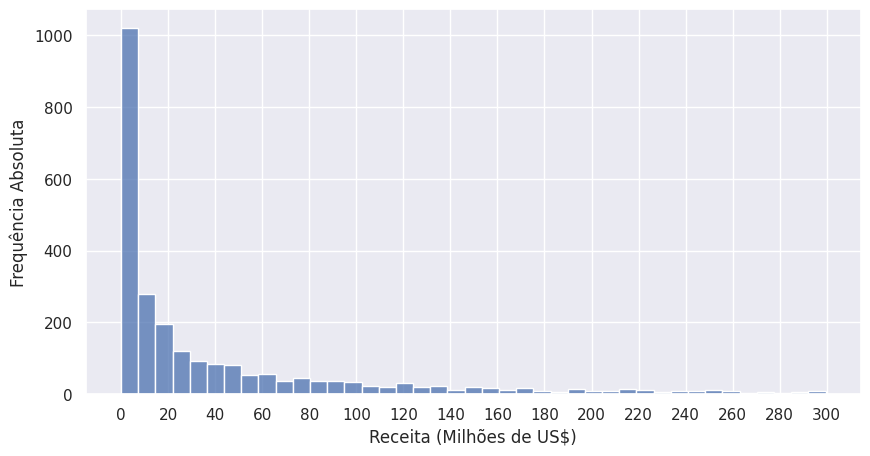

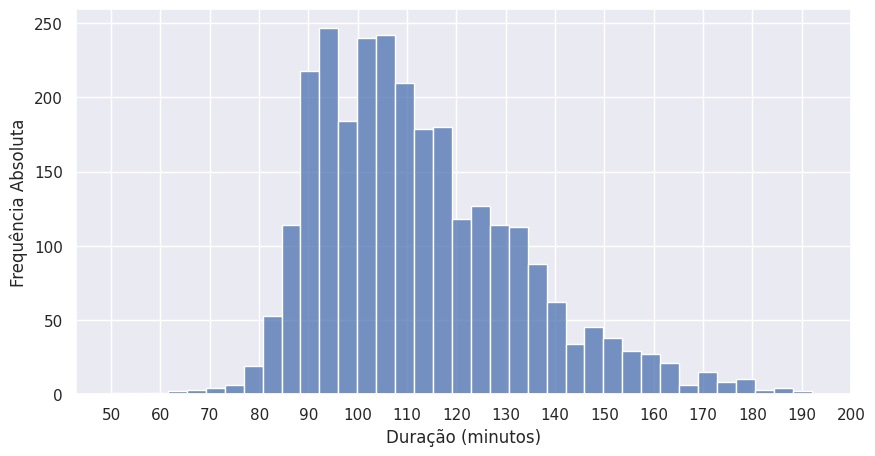

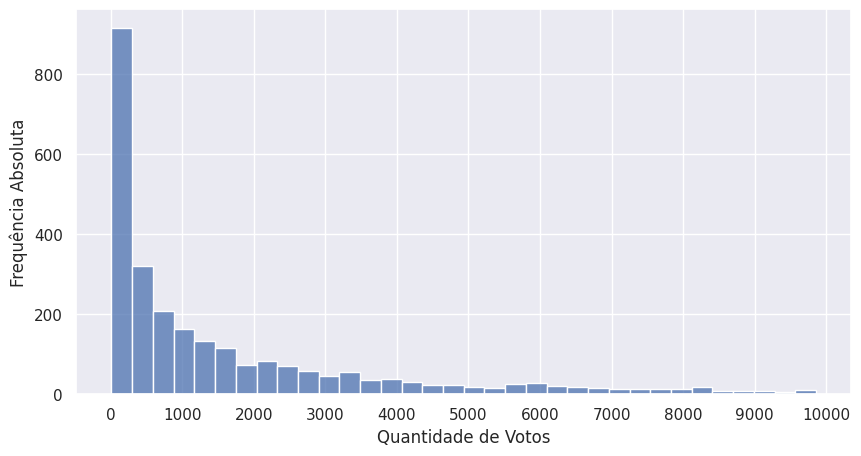

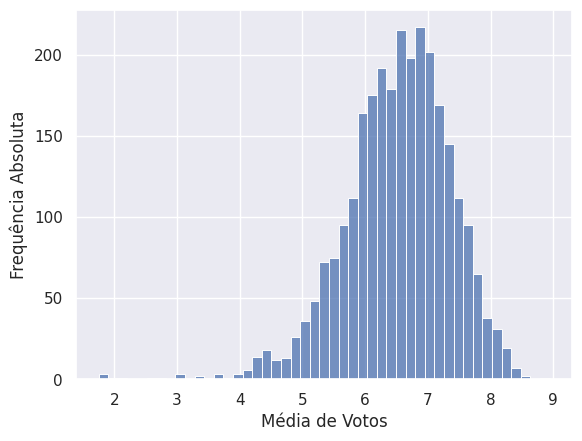

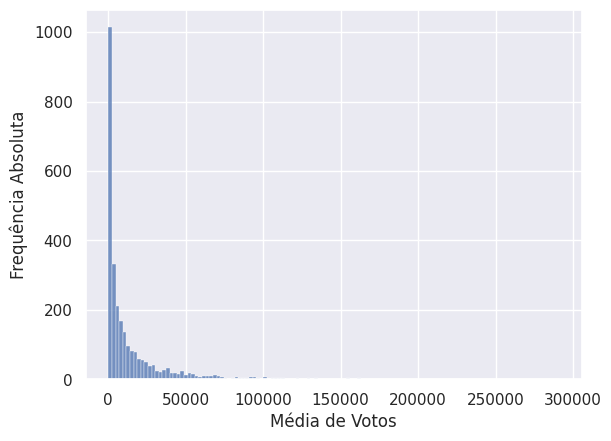

In [188]:
million = 1000000
df_movies = movies_data_by_year['all']
budget_mask = (df_movies['budget'] < 210 * million)
plt.figure(figsize=(10, 5))

sns.histplot(data=df_movies[budget_mask]['budget']/million)
plt.ylabel("Frequência Absoluta")
plt.xlabel("Orçamento (Milhões de US$)")
plt.xticks(range(0, 201, 10))
plt.show()

revenue_mask = (df_movies['revenue'] < 300 * million)
plt.figure(figsize=(10, 5))
sns.histplot(df_movies['revenue'][revenue_mask]/million)
plt.ylabel("Frequência Absoluta")
plt.xlabel("Receita (Milhões de US$)")
plt.xticks(range(0, 301, 20))
plt.show()

plt.figure(figsize=(10, 5))
runtime_mask = (df_movies['runtime'] >= 50) & (df_movies['runtime'] <= 200)
sns.histplot(df_movies[runtime_mask]['runtime'])
plt.ylabel("Frequência Absoluta")
plt.xlabel("Duração (minutos)")
plt.xticks(range(50, 201, 10))
plt.show()

plt.figure(figsize=(10, 5))
vote_count_mask = (df_movies['vote_count'] <= 10000)
sns.histplot(df_movies[vote_count_mask]['vote_count'])
plt.ylabel("Frequência Absoluta")
plt.xlabel("Quantidade de Votos")
plt.xticks(range(0, 10001, 1000))
plt.show()

sns.histplot(df_movies['vote_average'])
plt.ylabel("Frequência Absoluta")
plt.xlabel("Média de Votos")
plt.show()

sns.histplot(df_movies['vote_average'] * df_movies['vote_count'])
plt.ylabel("Frequência Absoluta")
plt.xlabel("Média de Votos")
plt.show()

In [ ]:
for year in range(start_year, end_year+1):
    values = year, movies_count(year), budget_mean(year), revenue_mean(year), runtime_mean(year), vote_count_mean(year), vote_mean_by_year(year)
    for value in values:
        print("{:.2f}".format(value), " & " , end="")
    print("")
    
movies = movies_data_by_year['all']
movies[movies.duplicated(keep='last')]



2013.00  & 330.00  & 29303094.60  & 84494262.40  & 111.97  & 2372.05  & 6.79  & 
2014.00  & 314.00  & 27957622.18  & 89641096.38  & 109.75  & 2648.03  & 7.01  & 
2015.00  & 298.00  & 28644129.90  & 97031834.21  & 111.99  & 2429.60  & 6.81  & 
2016.00  & 338.00  & 30994672.34  & 92910089.53  & 112.04  & 2470.69  & 6.83  & 
2017.00  & 304.00  & 29986882.77  & 104869605.15  & 112.58  & 2613.95  & 6.96  & 
2018.00  & 272.00  & 30722275.32  & 110836926.46  & 112.61  & 2359.91  & 7.00  & 
2019.00  & 251.00  & 32862991.07  & 119087300.21  & 111.95  & 2376.76  & 7.14  & 
2020.00  & 131.00  & 26146797.60  & 39878272.18  & 106.04  & 1548.56  & 7.04  & 
2021.00  & 157.00  & 45572795.15  & 94433473.81  & 115.19  & 2137.90  & 7.21  & 
2022.00  & 173.00  & 39368203.98  & 105105561.14  & 115.13  & 1499.87  & 7.11  & 
2023.00  & 205.00  & 45161701.40  & 107470294.39  & 117.77  & 1106.56  & 7.14  & 


Empty DataFrame
Columns: [id, original_language, original_title, overview, release_date, title, vote_average, vote_count, belongs_to_collection, budget, genres, production_companies, production_countries, revenue, runtime, spoken_languages, tagline, cast, crew, keywords, year]
Index: []

[0 rows x 21 columns]

In [ ]:
for year in range(start_year, end_year+1):
    values = year, movies_count(year), budget_mean(year), revenue_mean(year), runtime_mean(year), vote_count_mean(year), vote_mean_by_year(year)
    for value in values:
        print("{:.2f}".format(value), " & " , end="")
    print("")
    
movies = movies_data_by_year['all']
movies[movies.duplicated(keep='last')]



2013.00  & 330.00  & 29303094.60  & 84494262.40  & 111.97  & 2372.05  & 6.79  & 
2014.00  & 314.00  & 27957622.18  & 89641096.38  & 109.75  & 2648.03  & 7.01  & 
2015.00  & 298.00  & 28644129.90  & 97031834.21  & 111.99  & 2429.60  & 6.81  & 
2016.00  & 338.00  & 30994672.34  & 92910089.53  & 112.04  & 2470.69  & 6.83  & 
2017.00  & 304.00  & 29986882.77  & 104869605.15  & 112.58  & 2613.95  & 6.96  & 
2018.00  & 272.00  & 30722275.32  & 110836926.46  & 112.61  & 2359.91  & 7.00  & 
2019.00  & 251.00  & 32862991.07  & 119087300.21  & 111.95  & 2376.76  & 7.14  & 
2020.00  & 131.00  & 26146797.60  & 39878272.18  & 106.04  & 1548.56  & 7.04  & 
2021.00  & 157.00  & 45572795.15  & 94433473.81  & 115.19  & 2137.90  & 7.21  & 
2022.00  & 173.00  & 39368203.98  & 105105561.14  & 115.13  & 1499.87  & 7.11  & 
2023.00  & 205.00  & 45161701.40  & 107470294.39  & 117.77  & 1106.56  & 7.14  & 


Empty DataFrame
Columns: [id, original_language, original_title, overview, release_date, title, vote_average, vote_count, belongs_to_collection, budget, genres, production_companies, production_countries, revenue, runtime, spoken_languages, tagline, cast, crew, keywords, year]
Index: []

[0 rows x 21 columns]

Mapas coropléticos

In [57]:
import numpy as np
import folium
import geopandas as gpd
from folium import Choropleth

geo_json_data = gpd.read_file('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json')
geo_json_data = geo_json_data.rename(columns={"name": "production_country"})
geo_countries_list = geo_json_data["production_country"].tolist()


country_mapping = {
    'Hong Kong': 'China',
    'Serbia': 'Republic of Serbia',
    'Aruba': 'Netherlands',
    'Singapore': 'Malaysia',
    'Congo': 'Democratic Republic of the Congo',
    'Bahamas': 'The Bahamas',
    'Guadaloupe': 'France'
}

for year in range (start_year, end_year+1):
    df = movies_data_by_year[year]
    df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    df_countries = df.explode('production_countries', ignore_index=True)
    country_counts = df_countries['production_countries'].value_counts().reset_index()
    country_counts.columns = ['production_country', 'count']
    country_counts['count'] = np.log10(country_counts['count'])

    country_counts.replace(country_mapping, inplace=True)
    
    df_countries_list = country_counts['production_country'].tolist()
    missing_countries = [country for country in df_countries_list if country not in geo_countries_list]

    # Exibe os países que não têm correspondência
    print("Países que não correspondem no GeoJSON:")
    print(missing_countries)
    

    # Inicializa o mapa
    m = folium.Map(location=[45, -90], zoom_start=1.5)

    # Adiciona o choropleth map ao mapa
    Choropleth(
        geo_data=geo_json_data,
        name='choropleth',
        data=country_counts,
        columns=['production_country', 'count'],
        key_on='feature.properties.production_country',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Log10(Número de Filmes por País)',
    ).add_to(m)

    # Adiciona os controles de camada
    folium.LayerControl().add_to(m)

    # Exibe o mapa
    m.save(f'choropleth/choropleth_paises_produtores-{year}.html')
    m


Países que não correspondem no GeoJSON:
['Tanzania', 'Samoa', 'Palestinian Territory', "Lao People's Democratic Republic", 'Netherlands Antilles', 'Syrian Arab Republic', "Cote D'Ivoire"]
Países que não correspondem no GeoJSON:
['Palestinian Territory', 'Syrian Arab Republic', "Lao People's Democratic Republic", 'Libyan Arab Jamahiriya', "Cote D'Ivoire"]
Países que não correspondem no GeoJSON:
['Palestinian Territory', 'Syrian Arab Republic', 'Serbia and Montenegro', 'Tanzania']
Países que não correspondem no GeoJSON:
['Palestinian Territory', "Lao People's Democratic Republic", 'Andorra', "Cote D'Ivoire"]
Países que não correspondem no GeoJSON:
['Syrian Arab Republic', 'Kyrgyz Republic', 'Palestinian Territory', 'Macao']
Países que não correspondem no GeoJSON:
['Palestinian Territory', 'Cape Verde', 'Syrian Arab Republic', 'Monaco', 'Kyrgyz Republic', 'Libyan Arab Jamahiriya']
Países que não correspondem no GeoJSON:
['Syrian Arab Republic', 'Christmas Island', 'Kiribati', 'Palestinian

Nuvem de Palavras, grafo e histograma de generos de filmes

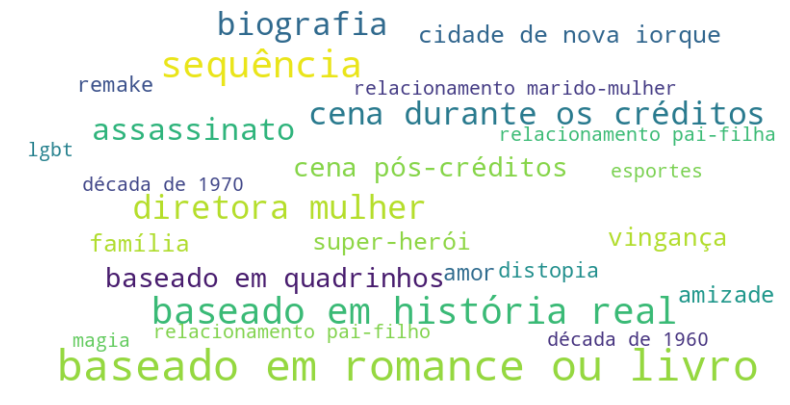

['based on novel or book', 'sequel', 'based on true story', 'woman director', 'biography', 'duringcreditsstinger', 'murder', 'based on comic', 'aftercreditsstinger', 'revenge', 'new york city', 'superhero', 'family', 'friendship', 'love', 'dystopia', 'remake', 'lgbt', '1970s', 'husband wife relationship', 'parent child relationship', 'sports', 'father daughter relationship', 'magic', '1960s']
Counter({('based on true story', 'biography'): 75, ('based on comic', 'superhero'): 62, ('aftercreditsstinger', 'duringcreditsstinger'): 54, ('based on novel or book', 'based on true story'): 40, ('aftercreditsstinger', 'superhero'): 39, ('aftercreditsstinger', 'based on comic'): 38, ('based on comic', 'duringcreditsstinger'): 38, ('duringcreditsstinger', 'superhero'): 35, ('duringcreditsstinger', 'sequel'): 33, ('based on novel or book', 'biography'): 32, ('aftercreditsstinger', 'sequel'): 30, ('based on novel or book', 'love'): 26, ('based on novel or book', 'sequel'): 24, ('based on novel or bo

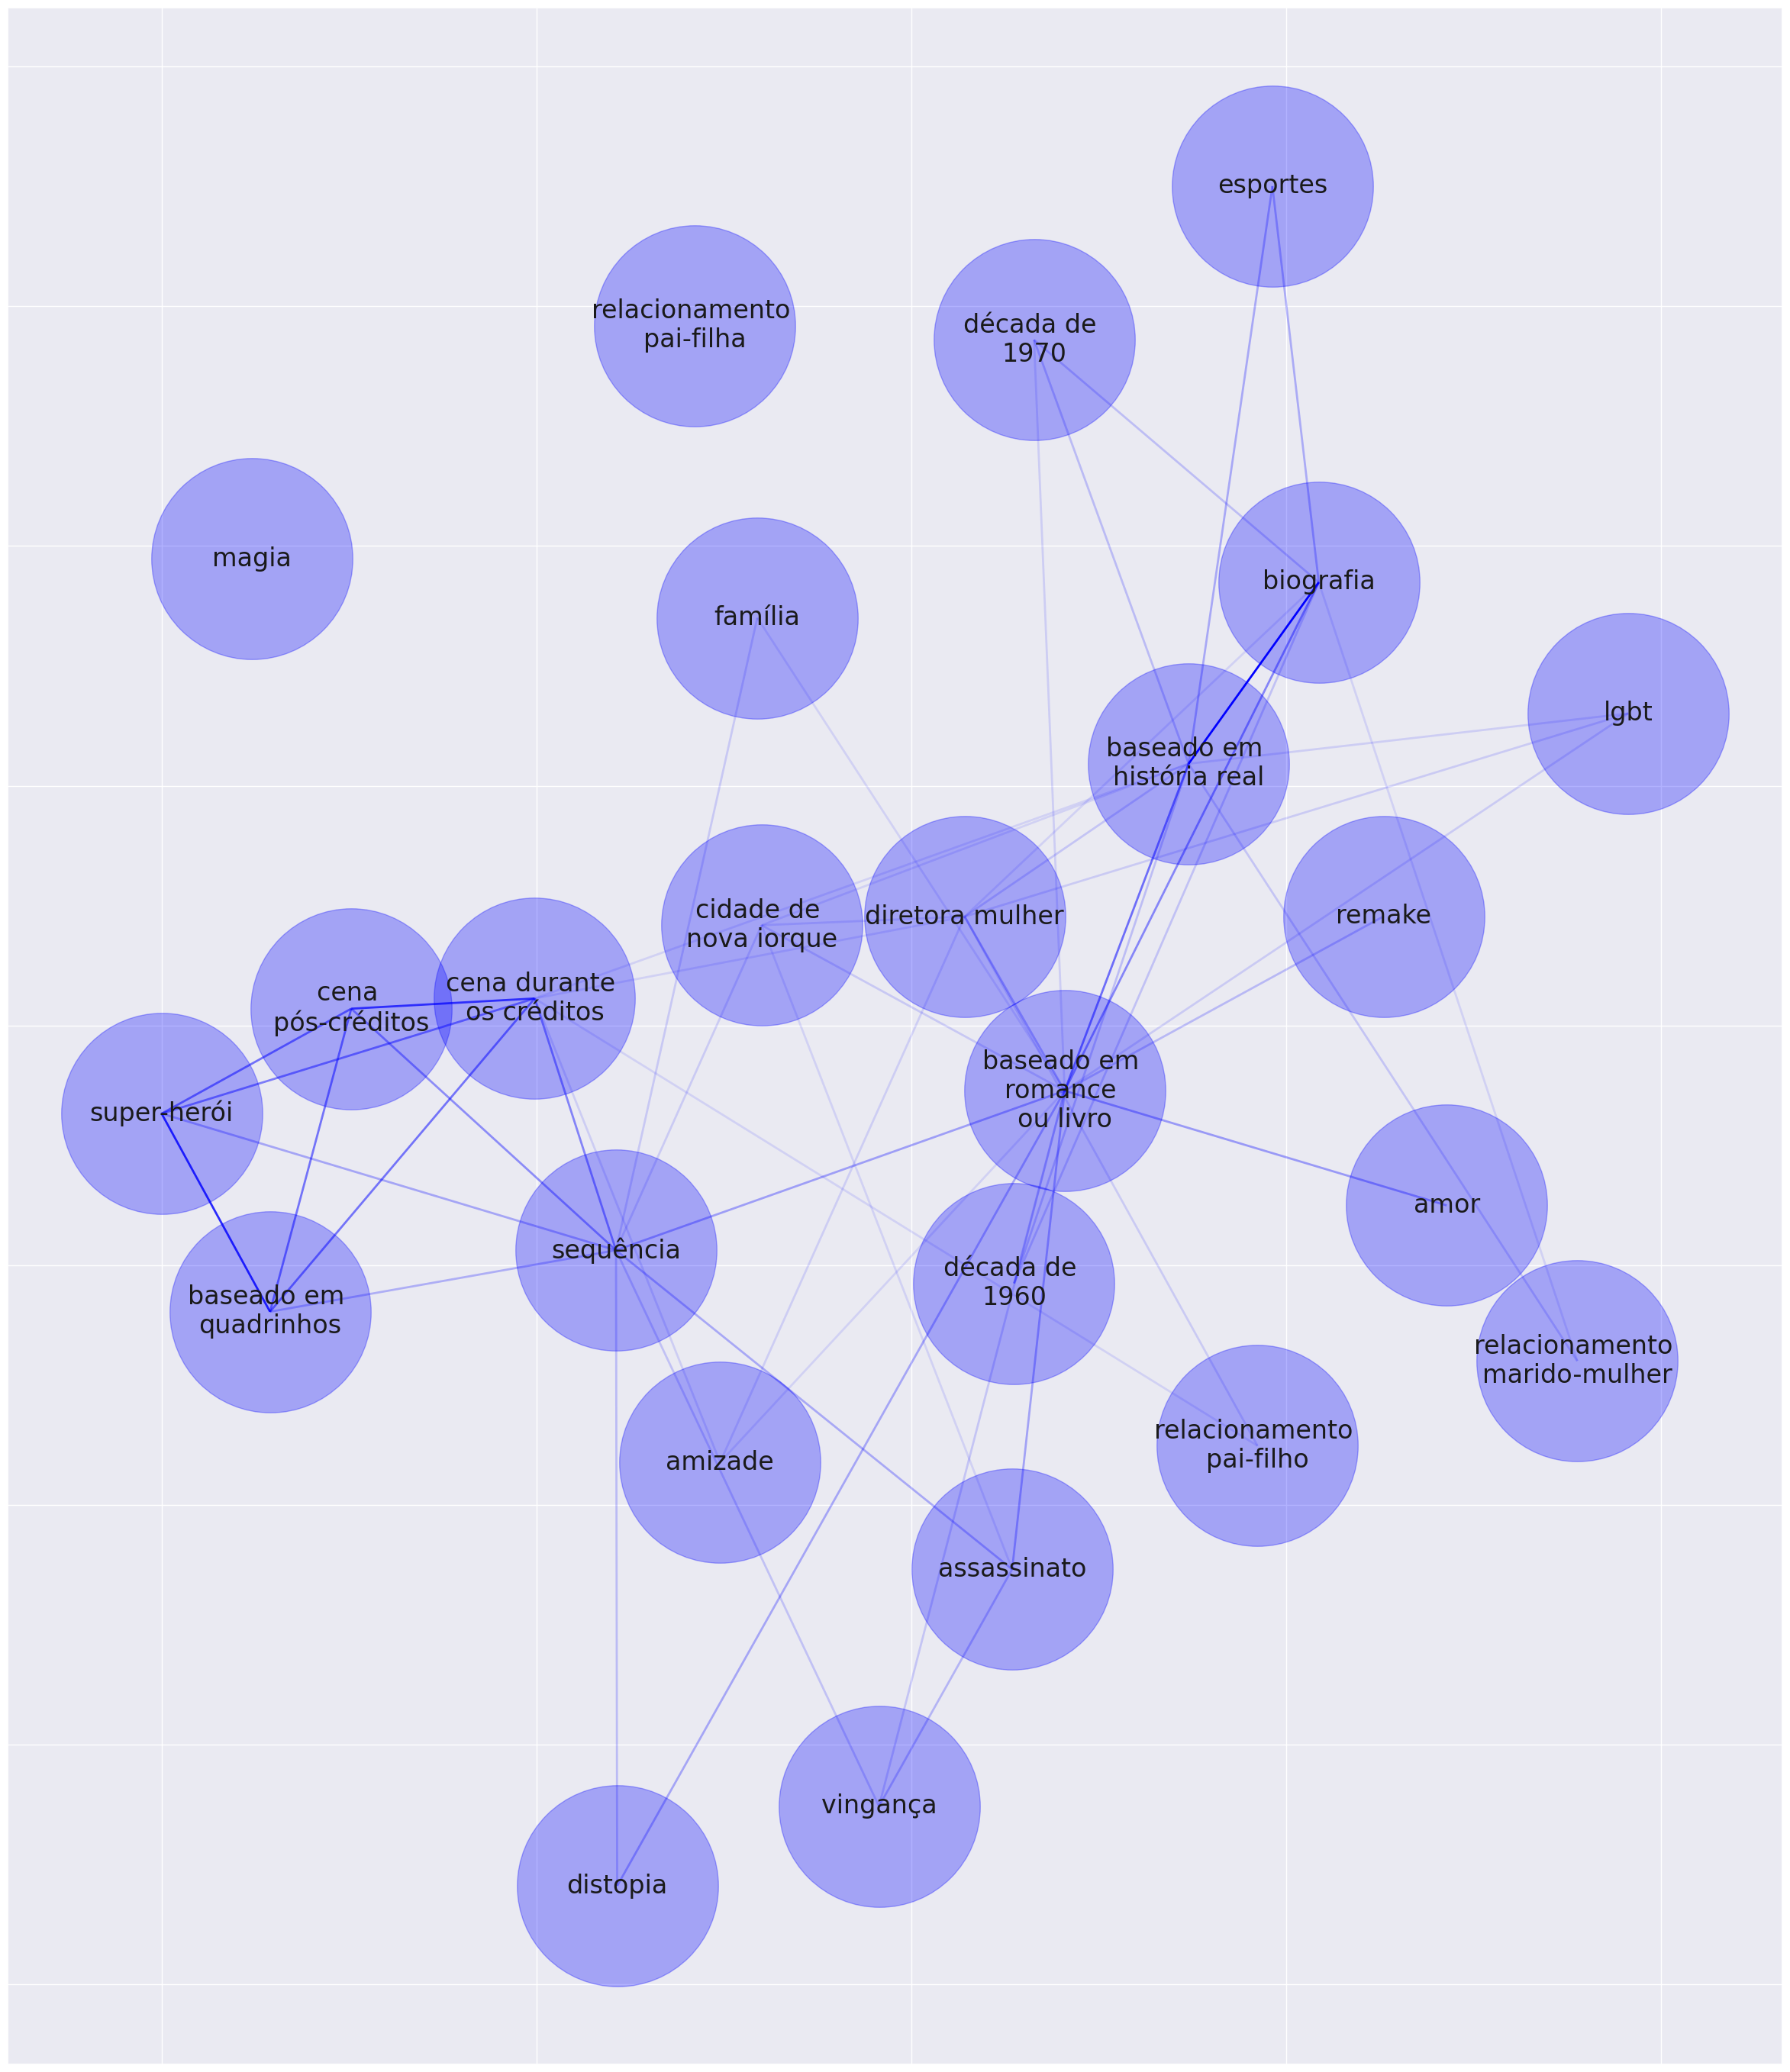

In [126]:
from wordcloud import WordCloud
from itertools import combinations
import networkx as nx

df = movies_data_by_year['all']

quantity_of_words = 25

# Mapa de palavaras para keywords
df['keywords'] =  df['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_keywords = df.explode('keywords', ignore_index=True).dropna(subset='keywords')['keywords']
all_keywords = [str(keyword).strip() for keyword in df_keywords]
keyword_counts = Counter(all_keywords)
keyword_counts_most_common = keyword_counts.most_common(quantity_of_words)

translated_keywords = {
    'based on novel or book': 'baseado em \nromance \nou livro',
    'sequel': 'sequência',
    'based on true story': 'baseado em \nhistória real',
    'woman director': 'diretora mulher',
    'biography': 'biografia',
    'duringcreditsstinger': 'cena durante \nos créditos',
    'murder': 'assassinato',
    'based on comic': 'baseado em \nquadrinhos',
    'aftercreditsstinger': 'cena \npós-créditos',
    'revenge': 'vingança',
    'new york city': 'cidade de \nnova iorque',
    'superhero': 'super-herói',
    'family': 'família',
    'friendship': 'amizade',
    'love': 'amor',
    'lgbt': 'lgbt',
    'dystopia': 'distopia',
    'remake': 'remake',
    'husband wife relationship': 'relacionamento \nmarido-mulher',
    '1970s': 'década de \n1970',
    '1960s': 'década de \n1960',
    'parent child relationship': 'relacionamento \npai-filho',
    'magic': 'magia',
    'sports': "esportes",
    'father daughter relationship': 'relacionamento \npai-filha'
}

keyword_counts_translated = [(translated_keywords.get(keyword, keyword).replace("\n", ""), count) for keyword, count in keyword_counts_most_common]


keyword_counts_dict = {k: v for k, v in keyword_counts_translated}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title(f'Word Cloud das Keywords')
plt.show()

keywords_filter_list = [k for k,v in keyword_counts_most_common]
print(keywords_filter_list)

co_occurrence_counts = Counter()
for keywords in df['keywords']:
    filtered_keywords = [keyword for keyword in keywords if keyword in keywords_filter_list]
    co_occurrence_counts.update(Counter(combinations(sorted(filtered_keywords), 2)))

G = nx.Graph()

print(co_occurrence_counts)

max_co_occurrence = co_occurrence_counts.most_common(1)[0][1]
for (keyword1, keyword2), count in co_occurrence_counts.items():
    # norm = float(count) / max_co_occurrence
    norm = float(count) / max_co_occurrence
    G.add_edge(translated_keywords[keyword1], translated_keywords[keyword2], weight=norm)
    
pos = nx.spring_layout(G, k=0.4)

# Desenhando o grafo
plt.figure(figsize=(30, 35))

# Desenhando as arestas com pesos
max_weight = max((data['weight'] for u, v, data in G.edges(data=True)))
edges = nx.draw_networkx_edges(
    G, pos, edge_color='blue', alpha=[G[u][v]['weight'] if G[u][v]['weight'] > 0.1 else 0 for u, v in G.edges()],
    width=2
)

# Desenhando os nós com tamanhos proporcionais à frequência
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=36000,
    node_color='blue', alpha=0.3
)

# Desenhando os rótulos dos nós
labels = nx.draw_networkx_labels(G, pos, font_size=24)

# plt.title('Grafo de Co-Ocorrência das Keywords')
plt.show()



0       Comédia
1         Drama
2       Romance
3         Crime
4       Comédia
         ...   
7053    Comédia
7054    Romance
7055    Comédia
7056      Drama
7057    Comédia
Name: genres, Length: 7057, dtype: object


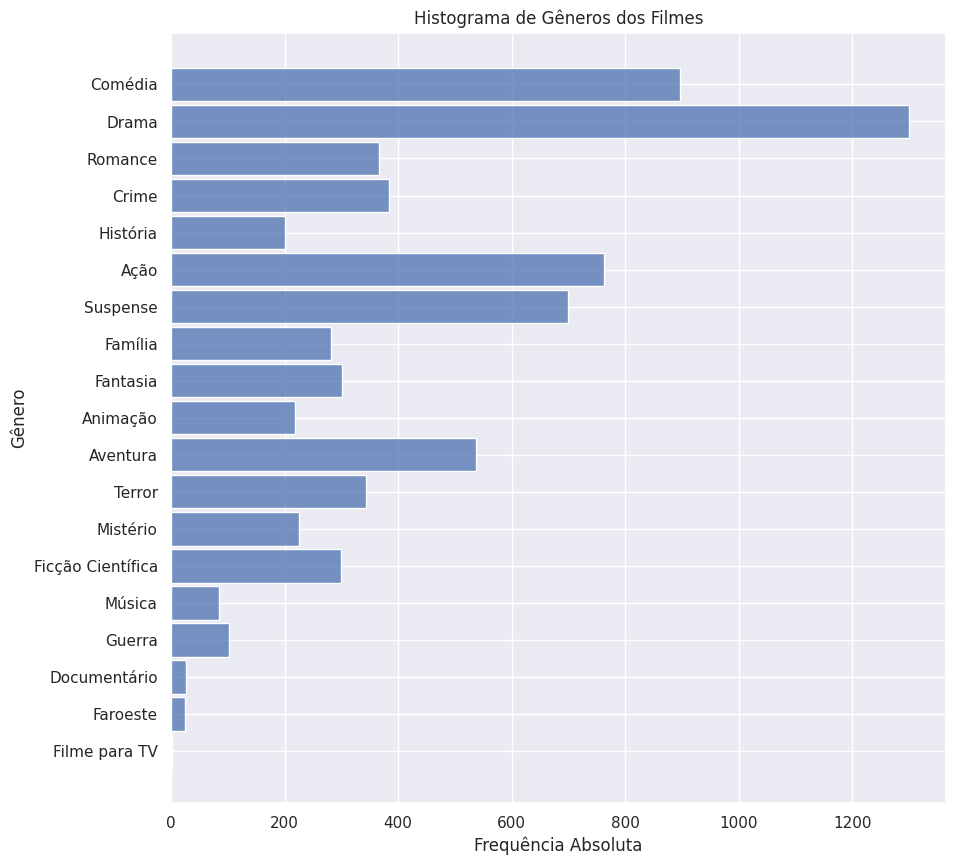

In [128]:
genre_translation = {
    'Action': 'Ação',
    'Adventure': 'Aventura',
    'Animation': 'Animação',
    'Comedy': 'Comédia',
    'Crime': 'Crime',
    'Documentary': 'Documentário',
    'Drama': 'Drama',
    'Family': 'Família',
    'Fantasy': 'Fantasia',
    'History': 'História',
    'Horror': 'Terror',
    'Music': 'Música',
    'Mystery': 'Mistério',
    'Romance': 'Romance',
    'Science Fiction': 'Ficção Científica',
    'Thriller': 'Suspense',
    'TV Movie': 'Filme para TV',
    'War': 'Guerra',
    'Western': 'Faroeste'
}

def translate_genres(genres, translation_dict):
    return [translation_dict.get(genre, genre) for genre in genres]

df = movies_data_by_year['all']
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_genres = df.explode('genres', ignore_index=True).dropna(subset='genres')
df_genres['genres'] = df_genres['genres'].apply(lambda x:genre_translation[x])
print(df_genres['genres'])
# print(df_genres)

# all_genres = [genre for sublist in df['genres'] for genre in sublist]
plt.figure(figsize=(10, 10))
sns.histplot(data=df_genres, y='genres', discrete=True, shrink=0.9)
plt.title('Histograma de Gêneros dos Filmes')
plt.xlabel('Frequência Absoluta')
plt.ylabel('Gênero')
# plt.xticks(rotation=45)
plt.show()


Análise de Gêneros do Elenco

In [197]:
gender_translation = {
    "Not set/not specified": "Não definido / Não especificado",
    "Female": "Mulher",
    "Male": "Homem",
    "Non-binary": "Não-binário"
}

df = movies_data_by_year['all']
df["release_date"] = pd.to_datetime(df["release_date"])
df['year'] = df['release_date'].dt.year

df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('cast')

# separa cada key do objeto em uma coluna
df_normalized = pd.concat([df_exploded.drop(['cast'], axis=1), df_exploded['cast'].apply(pd.Series)], axis=1)

gender_counts_per_year_cast = df_normalized.groupby(['year', 'gender']).size().reset_index(name='count')
gender_counts_per_year_cast = gender_counts_per_year_cast.sort_values(by=['year', 'gender'])

gender_counts_per_year_cast['gender'] = gender_counts_per_year_cast['gender'].apply(lambda x:gender_translation[x])


total_counts_per_year = df_normalized.groupby('year').size().reset_index(name='total_count')


gender_counts_per_year_cast_merged = gender_counts_per_year_cast.merge(total_counts_per_year, on='year')
gender_counts_per_year_cast_merged['percentage'] = (gender_counts_per_year_cast_merged['count'] / gender_counts_per_year_cast_merged['total_count']) * 100
gender_counts_per_year_cast_merged = gender_counts_per_year_cast_merged.sort_values(by=['year', 'gender'])

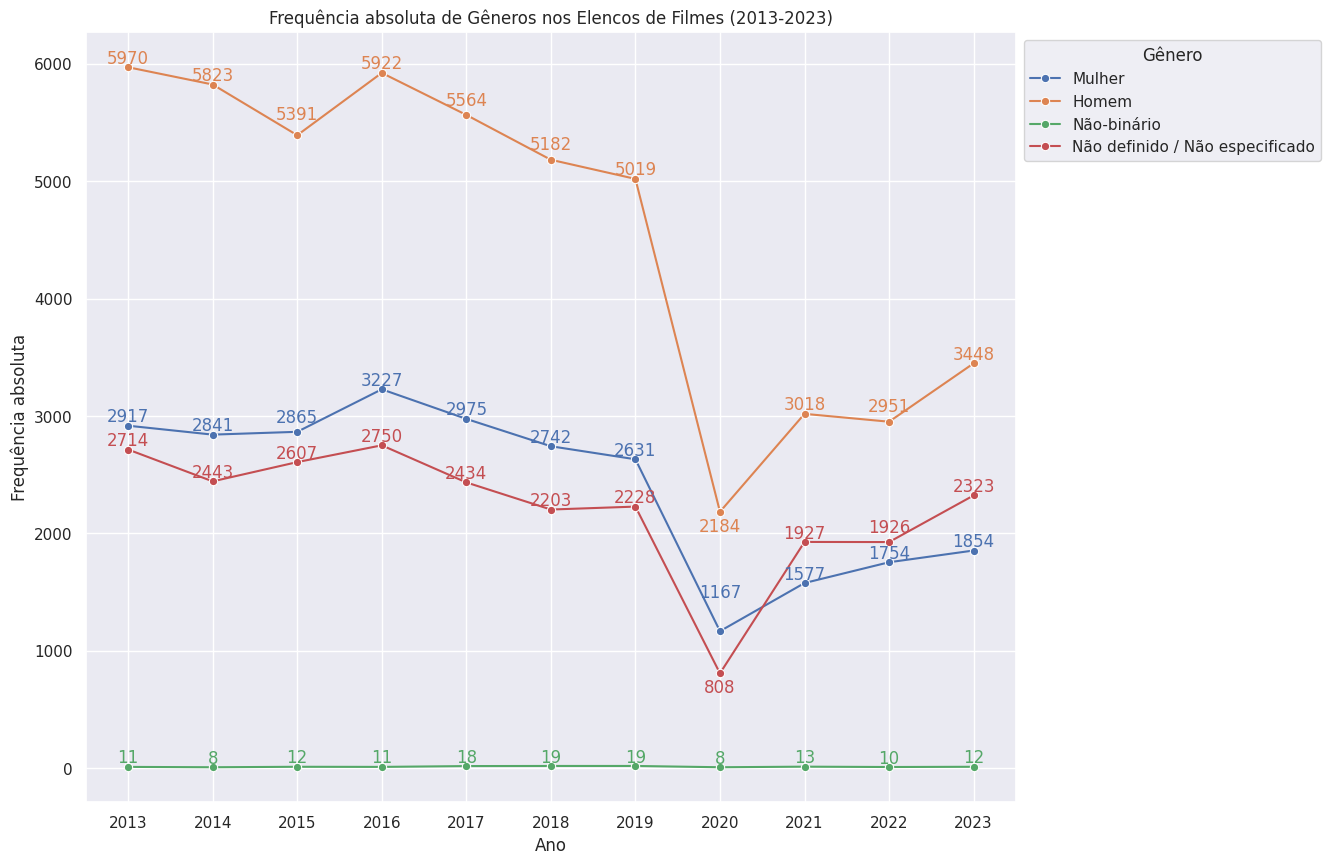

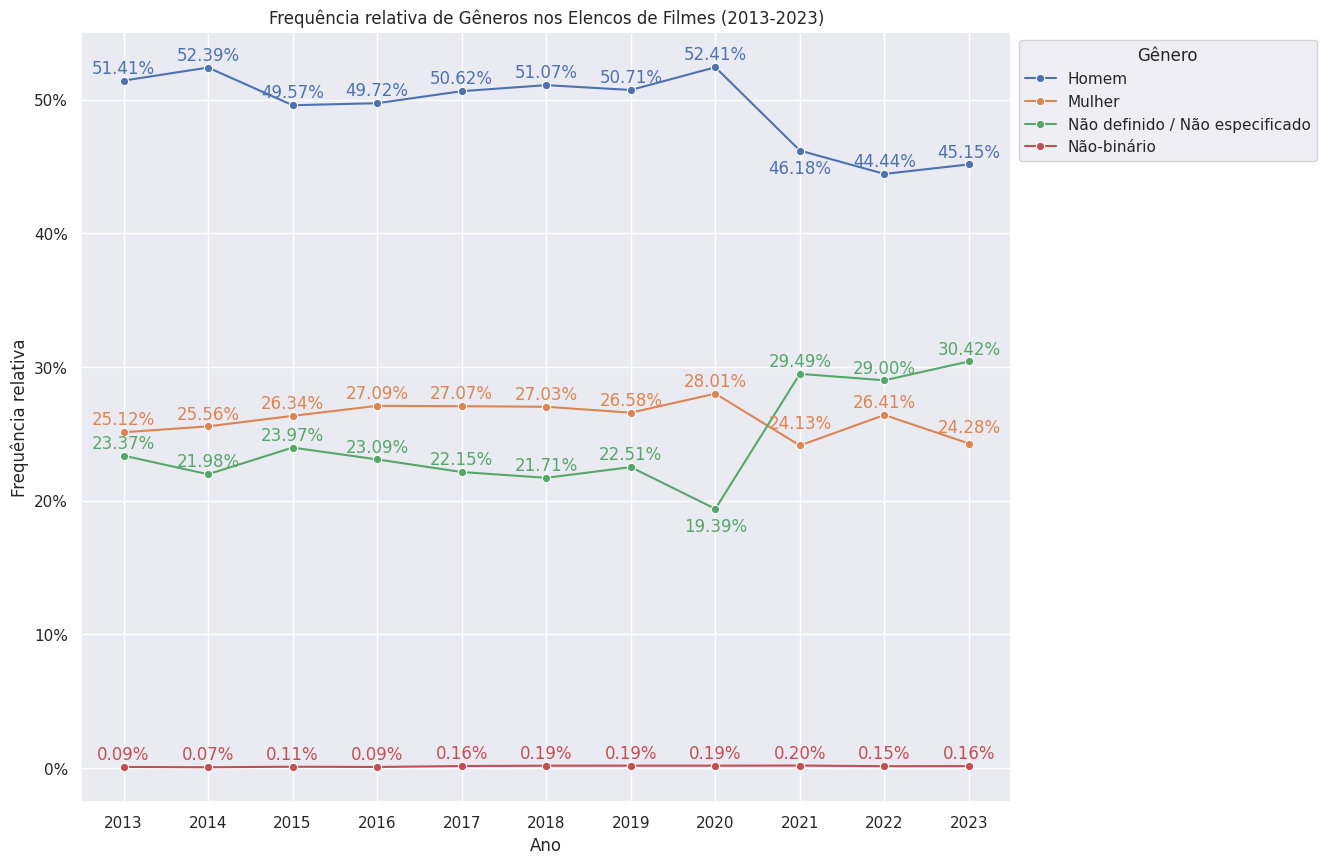

In [198]:
from matplotlib.ticker import FuncFormatter

pos_format = {
    5391: 100,
    5564: 50,
    5182: 50,
    2184: -200,
    2951: 50,
    2447: 50,
    808: -200,
    1926: 50,
    1167: 250,
    2865: 50,
}

plt.figure(figsize=(12, 10))
plot = sns.lineplot(data=gender_counts_per_year_cast, x='year', y='count', hue='gender', marker='o')
plt.xticks(ticks=range(gender_counts_per_year_cast['year'].min(), gender_counts_per_year_cast['year'].max() + 1))
for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (int(y_value) in pos_format):
            plot.text(x_value, y_value + pos_format[int(y_value)], f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value, f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        

plt.title('Frequência absoluta de Gêneros nos Elencos de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência absoluta')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

pos_format = {
    46.18: -2,
    24.13: 0.5,
    19.39: -2,
    24.13: 1,
    24.28: 0.5
}

plt.figure(figsize=(12, 10))
plt.xticks(ticks=range(gender_counts_per_year_cast_merged['year'].min(), gender_counts_per_year_cast['year'].max() + 1))
plot = sns.lineplot(data=gender_counts_per_year_cast_merged, x='year', y='percentage', hue='gender', marker='o', legend="full")

def percentage_formatter(x, pos):
    return f'{x:.0f}%'

for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (float(f'{y_value:.2f}') in pos_format):
            plot.text(x_value, y_value + pos_format[float(f'{y_value:.2f}')], f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value + 0.25, f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        
plot.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('Frequência relativa de Gêneros nos Elencos de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência relativa')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Grau de importância dos gêneros no elenco

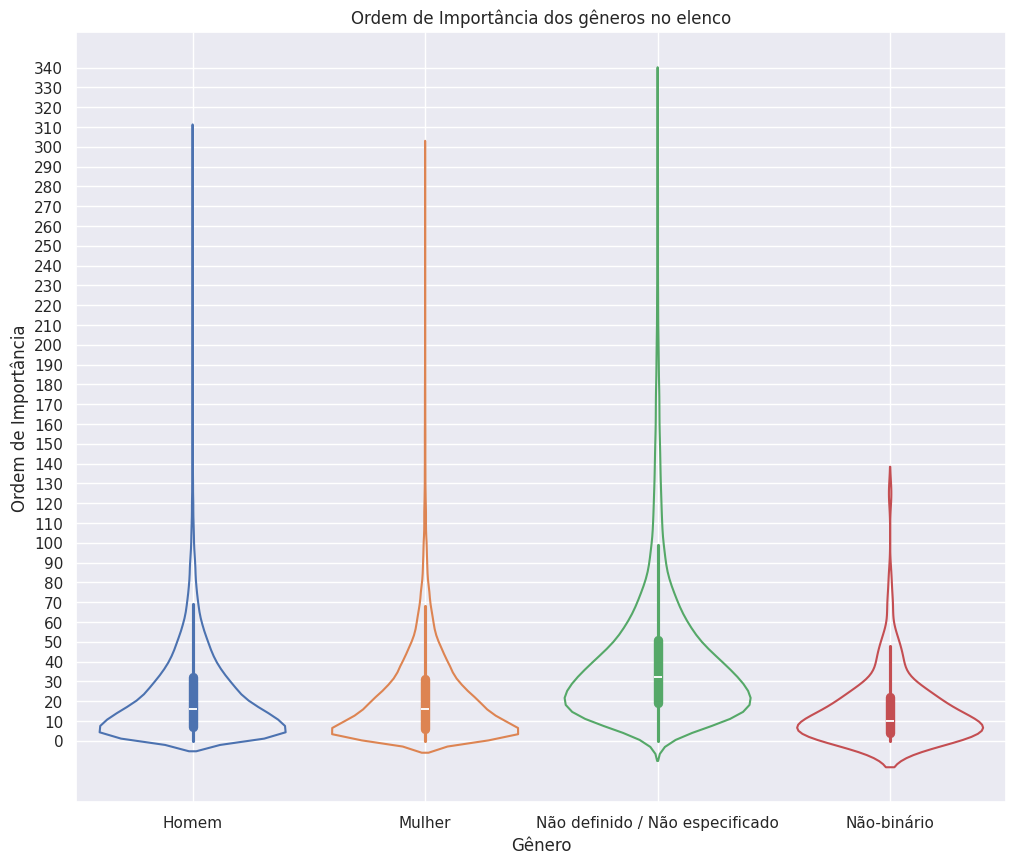

In [199]:
df_normalized_translated = df_normalized.copy()
df_normalized_translated['gender'] = df_normalized['gender'].apply(lambda x:gender_translation[x])

plt.figure(figsize=(12, 10))
sns.violinplot(data=df_normalized_translated, x='gender', y='order', hue='gender', fill=False)
plt.title('Ordem de Importância dos gêneros no elenco')
plt.xlabel('Gênero')
plt.ylabel('Ordem de Importância')
plt.grid(True, which='both', axis='both')

plt.yticks(np.arange(0, 350, 10))

# plt.ylim(-10, 50)
stats = df_normalized.groupby('gender')['order'].describe()
for gender in stats.index:
    median = stats.loc[gender, '50%']
    q1 = stats.loc[gender, '25%']
    q3 = stats.loc[gender, '75%']
    minimum = stats.loc[gender, 'min']
    maximum = stats.loc[gender, 'max']
    
    # Encontrar a posição no eixo x para anotar os valores
    x_pos = df_normalized['gender'].unique().tolist().index(gender)
    
    # Adicionar as anotações ao gráfico
    # plt.text(x_pos, median, f'Mediana: {median:.2f}', horizontalalignment='left', color='black')
    # plt.text(x_pos, q1, f'1Q: {q1:.2f}', horizontalalignment='left', color='blue')
    # plt.text(x_pos, q3, f'3Q: {q3:.2f}', horizontalalignment='left', color='blue')
    # plt.text(x_pos, minimum, f'Min: {minimum:.2f}', horizontalalignment='left', color='red')
    # plt.text(x_pos, maximum, f'Max: {maximum:.2f}', horizontalalignment='left', color='red')


plt.show()

/tmp/ipykernel_1708/2239258896.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gênero')


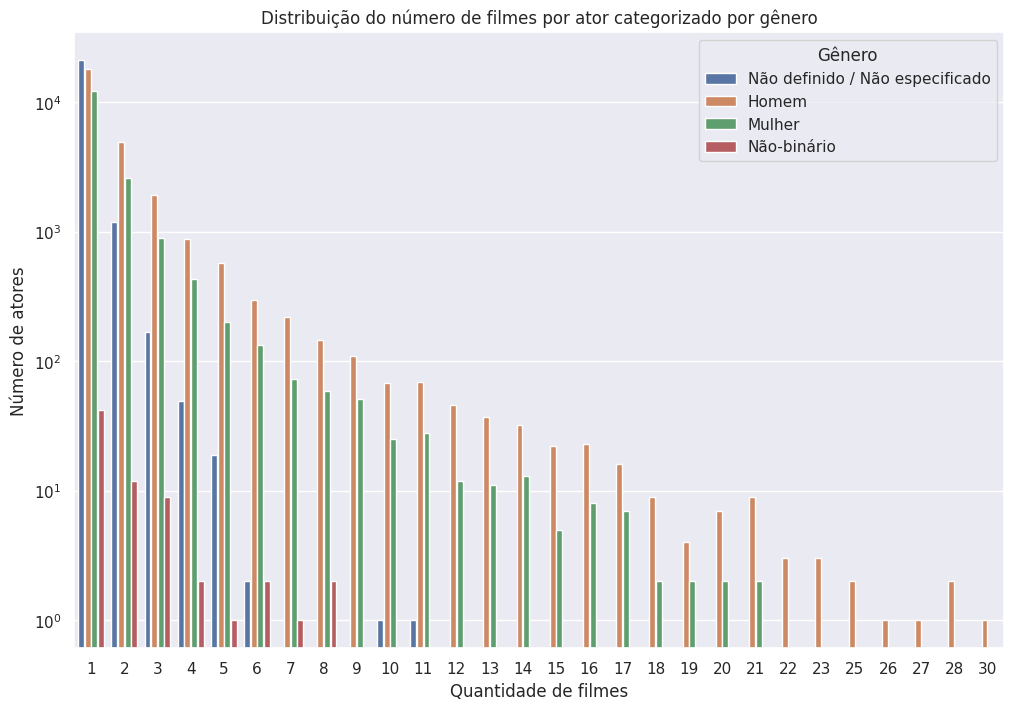

In [200]:
plt.figure(figsize=(12, 8))
plt.title('Distribuição do número de filmes por ator categorizado por gênero')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Número de atores')
plt.yscale('log')
plt.legend(title='Gênero')

# plt.yticks(np.arange(0, 11, 1))
top_names = df_normalized_translated[["gender", "name"]].value_counts().reset_index(name='movies_amount')
movies_count = top_names[['movies_amount', 'gender']].value_counts().reset_index()
movies_count
movies_count.columns = ['movies_amount', 'gender', 'num_actors']
plt.yscale('log')
ax = sns.barplot(x='movies_amount', y='num_actors', data=movies_count, hue="gender", gap= 0.1)
ax.get_legend().set_title("Gênero")
# ax.tick_params(axis='x', labelsize=10)


# top_names = top_names.groupby('gender').head(20)
# sns.histplot(x='count', y='gender', data=top_names, hue='gender')

# sns.barplot(x='count', y='name', hue='gender', data=top_names, orient='h')

# plt.show()
# plt.xticks(np.arange(0, 31, 1))
# plt.grid(True, which='both', axis='both')
# sns.barplot(data=top_names, x="count", hue="gender",  multiple="stack", bins=50)
# plt.show()

# top_names

Análise Gênero da produção

In [201]:
gender_translation = {
    "Not set/not specified": "Não definido / Não especificado",
    "Female": "Mulher",
    "Male": "Homem",
    "Non-binary": "Não-binário"
}

df = movies_data_by_year['all']
df["release_date"] = pd.to_datetime(df["release_date"])
df['year'] = df['release_date'].dt.year

df["crew"] = df["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('crew')

# separa cada key do objeto em uma coluna
df_normalized = pd.concat([df_exploded.drop(['crew'], axis=1), df_exploded['crew'].apply(pd.Series)], axis=1)

gender_counts_per_year_crew = df_normalized.groupby(['year', 'gender']).size().reset_index(name='count')
gender_counts_per_year_crew = gender_counts_per_year_crew.sort_values(by=['year', 'gender'])

gender_counts_per_year_crew['gender'] = gender_counts_per_year_crew['gender'].apply(lambda x:gender_translation[x])


total_counts_per_year = df_normalized.groupby('year').size().reset_index(name='total_count')


gender_counts_per_year_crew_merged = gender_counts_per_year_crew.merge(total_counts_per_year, on='year')
gender_counts_per_year_crew_merged['percentage'] = (gender_counts_per_year_crew_merged['count'] / gender_counts_per_year_crew_merged['total_count']) * 100
gender_counts_per_year_crew_merged = gender_counts_per_year_crew_merged.sort_values(by=['year', 'gender'])

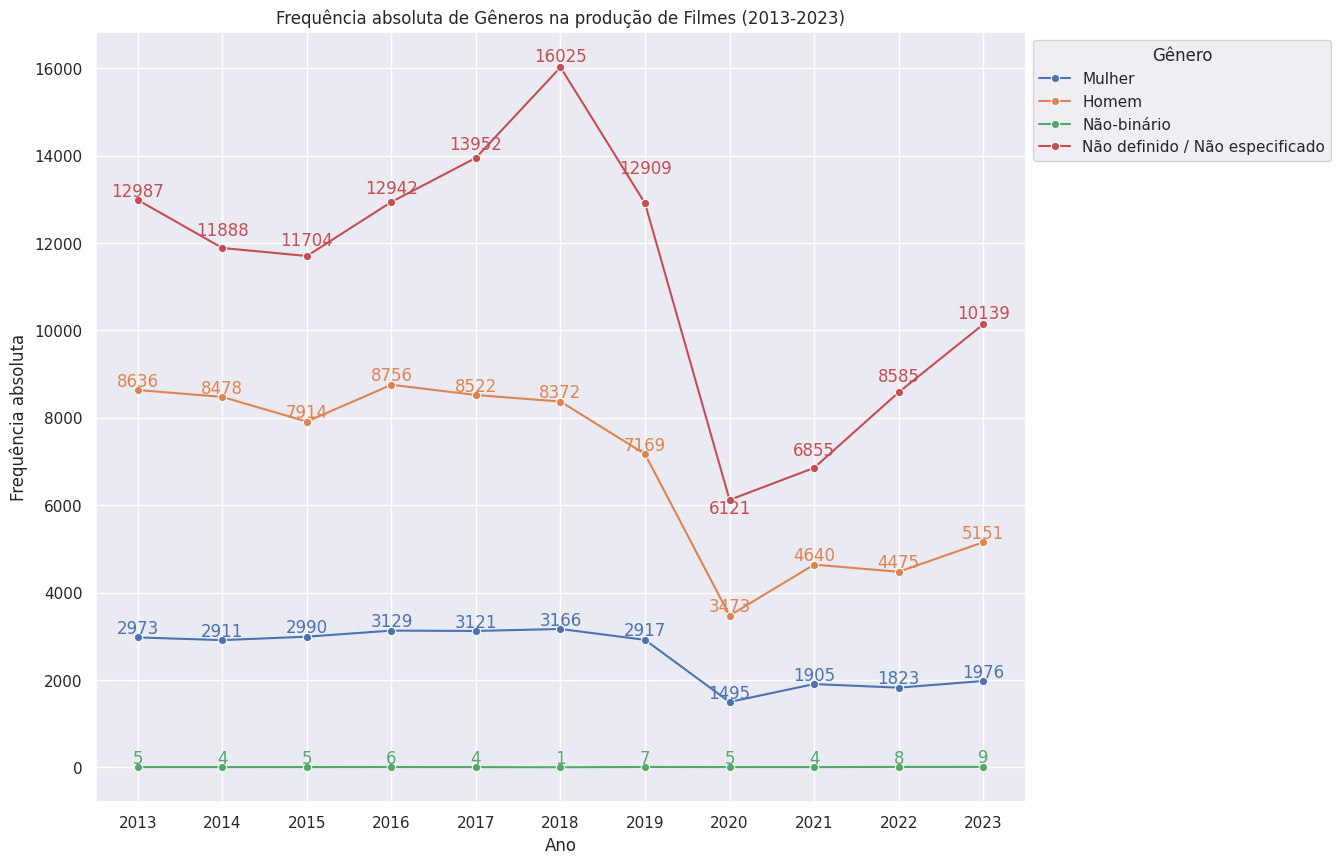

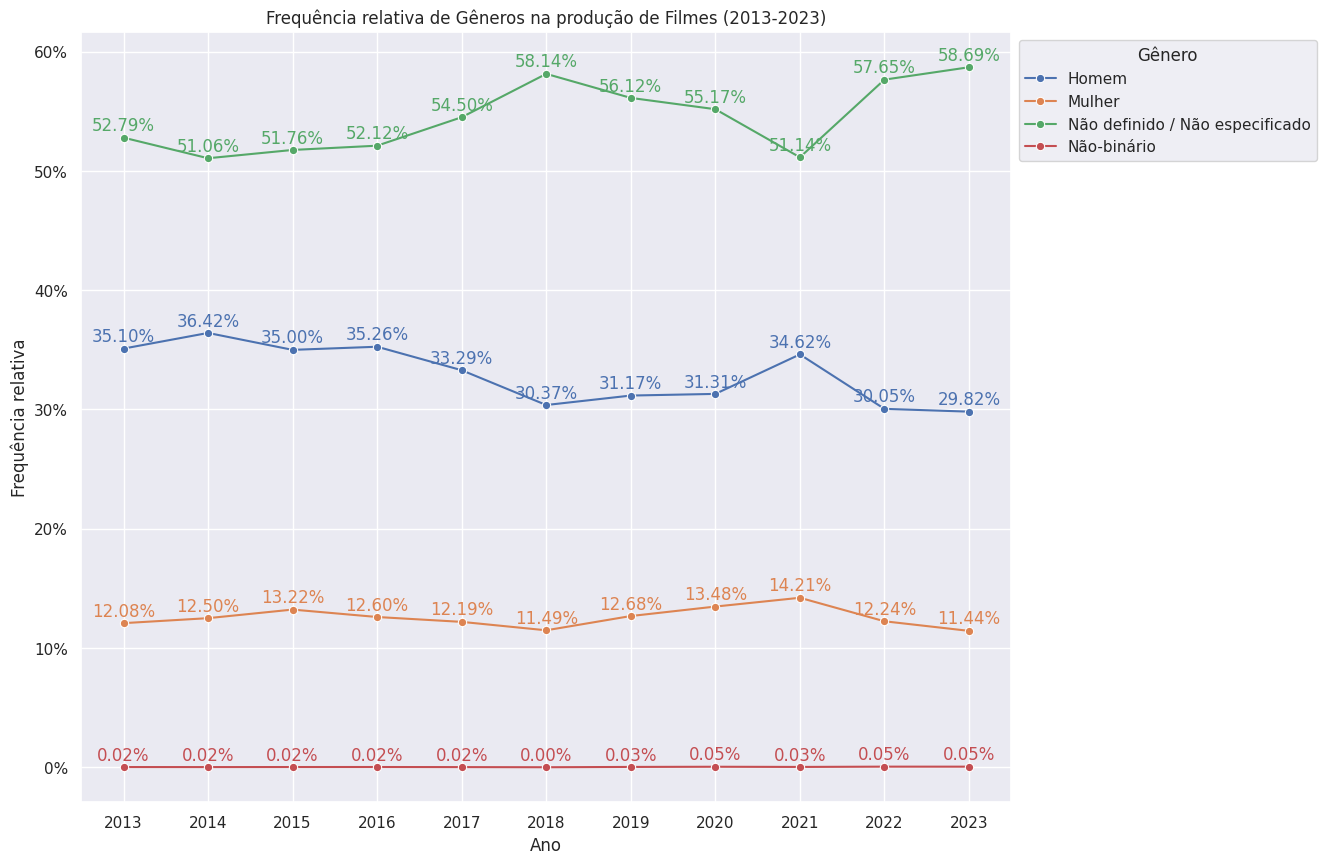

In [202]:
from matplotlib.ticker import FuncFormatter

pos_format = {
    11888: 200,
    11704: 150,
    12942: 100,
    13952: 100,
    16025: 50,
    12909: 600,
    6121: -400,
    6855: 200,
    8585: 150,
    10139: 50,
}

plt.figure(figsize=(12, 10))
plot = sns.lineplot(data=gender_counts_per_year_crew, x='year', y='count', hue='gender', marker='o')
plt.xticks(ticks=range(gender_counts_per_year_crew['year'].min(), gender_counts_per_year_crew['year'].max() + 1))
for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        if (int(y_value) in pos_format):
            plot.text(x_value, y_value + pos_format[int(y_value)], f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        else:
            plot.text(x_value, y_value, f'{y_value:.0f}', color=line.get_color(), ha="center", va="bottom")
        

plt.title('Frequência absoluta de Gêneros na produção de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência absoluta')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# pos_format = {
#     46.18: -2,
#     24.13: 0.5,
#     19.39: -2,
#     24.13: 1,
#     24.28: 0.5
# }

plt.figure(figsize=(12, 10))
plt.xticks(ticks=range(gender_counts_per_year_crew_merged['year'].min(), gender_counts_per_year_crew['year'].max() + 1))
plot = sns.lineplot(data=gender_counts_per_year_crew_merged, x='year', y='percentage', hue='gender', marker='o', legend="full")

def percentage_formatter(x, pos):
    return f'{x:.0f}%'

for line in plot.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        # if (float(f'{y_value:.2f}') in pos_format):
        #     plot.text(x_value, y_value + pos_format[float(f'{y_value:.2f}')], f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        # else:
        plot.text(x_value, y_value + 0.25, f'{y_value:.2f}%', color=line.get_color(), ha="center", va="bottom")
        
plot.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.title('Frequência relativa de Gêneros na produção de Filmes (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Frequência relativa')
plt.legend(title='Gênero')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

/tmp/ipykernel_1708/312217217.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["job"] = filtered["job"].apply(lambda x: jobs_translation[x] if x in jobs_translation else x)


[]

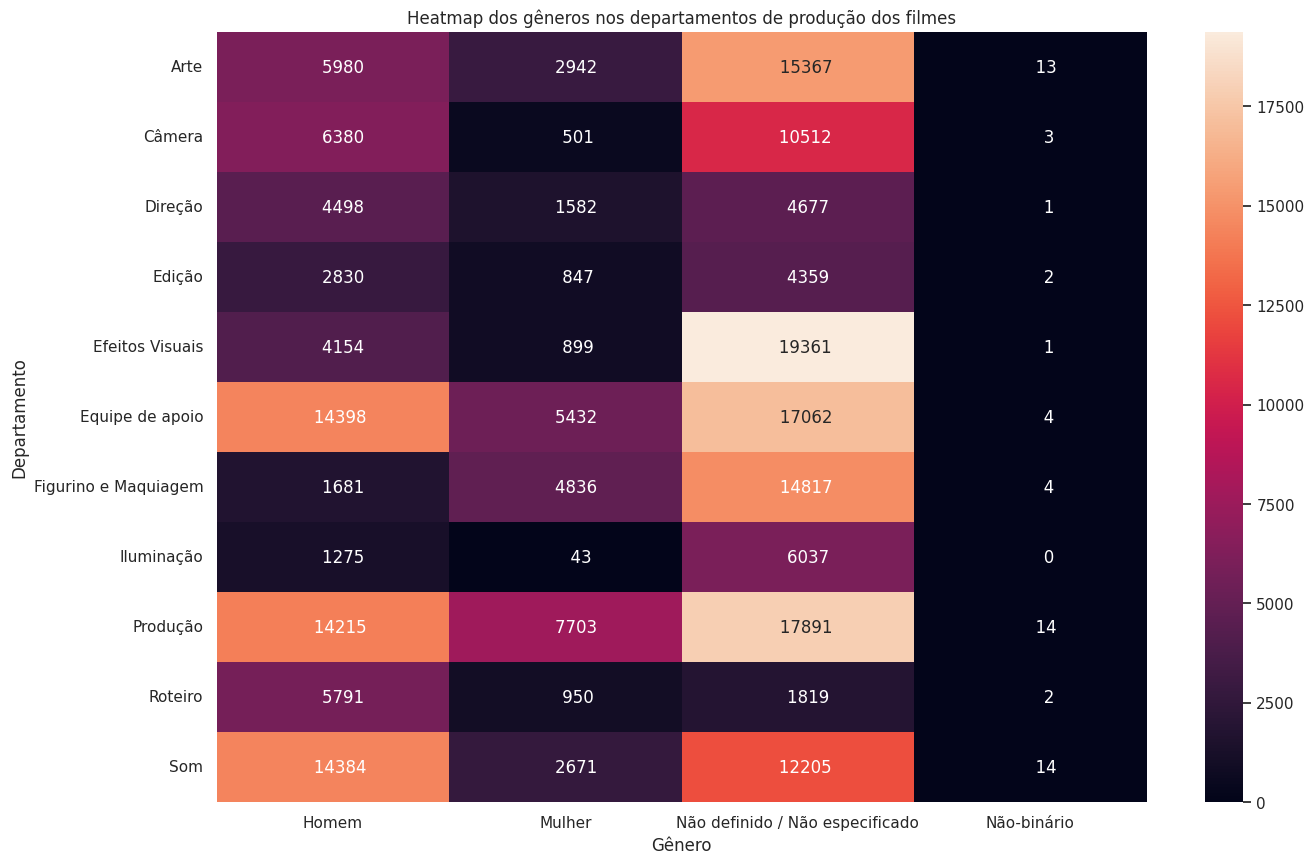

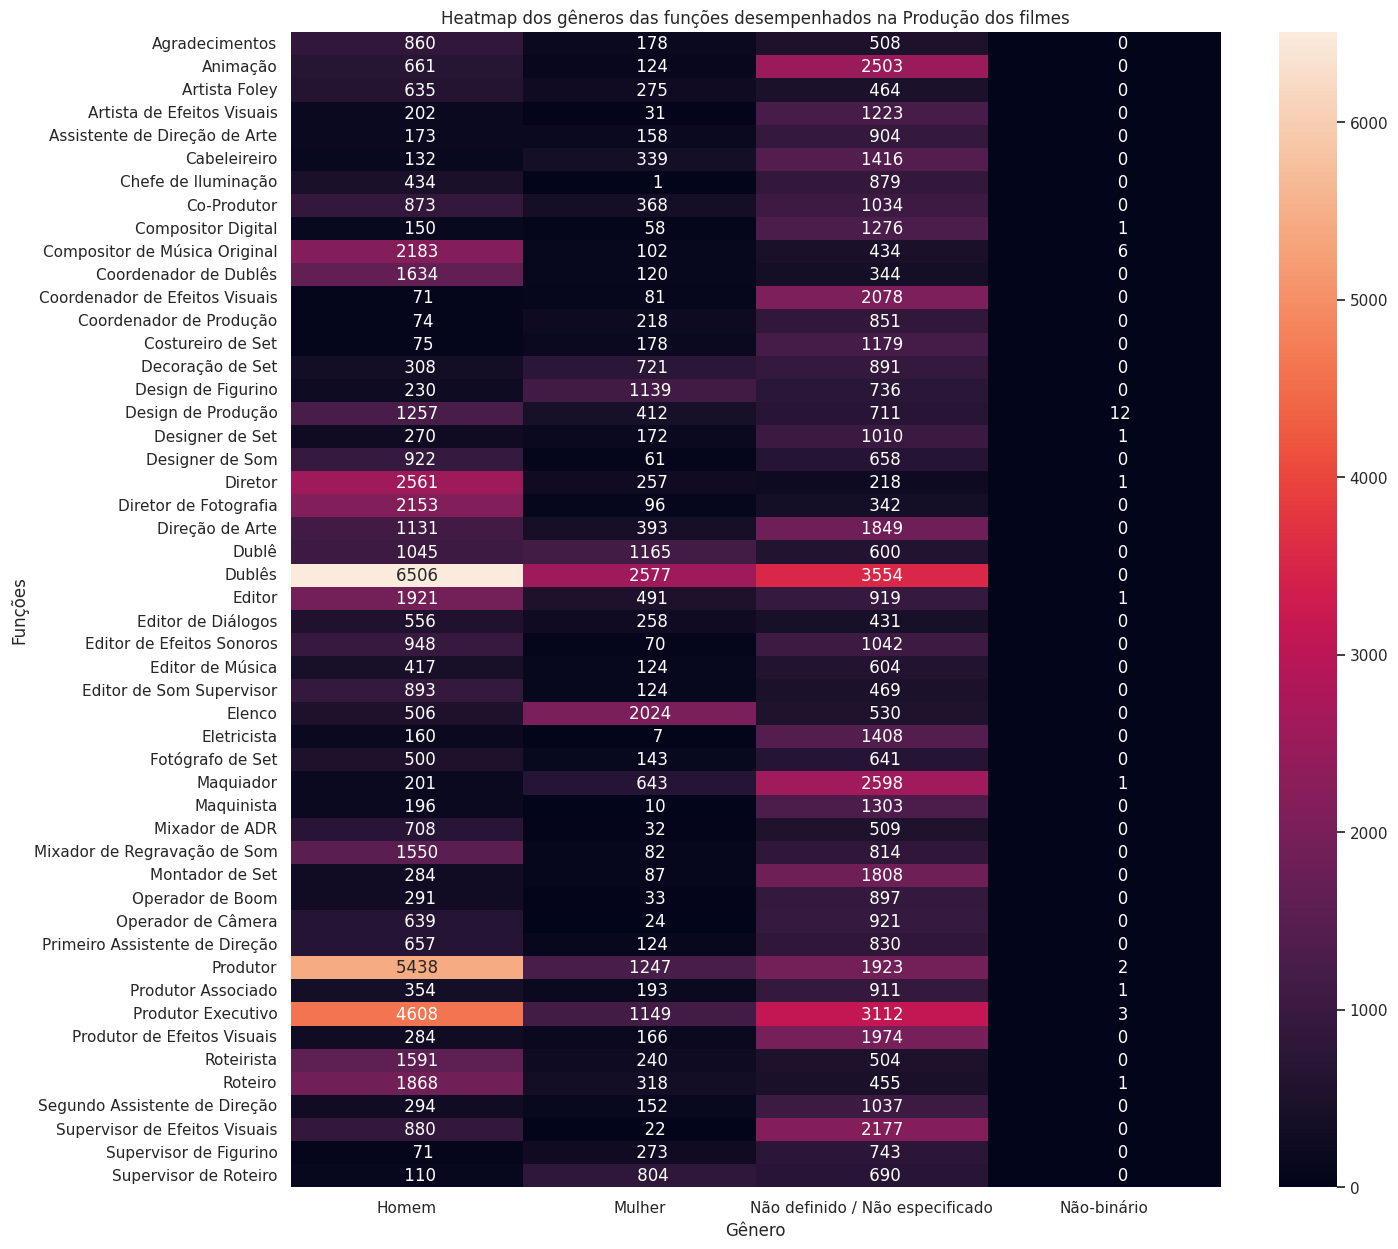

In [203]:
departments_translation = {
    "Art": "Arte",
    "Camera": "Câmera",
    "Costume & Make-Up": "Figurino e Maquiagem",
    "Crew": "Equipe de apoio",
    "Directing": "Direção",
    "Editing": "Edição",
    "Lighting": "Iluminação",
    "Production": "Produção",
    "Sound": "Som",
    "Visual Effects": "Efeitos Visuais",
    "Writing": "Roteiro"
}

jobs_translation = {
    "ADR Mixer": "Mixador de ADR",
    "Animation": "Animação",
    "Art Direction": "Direção de Arte",
    "Assistant Art Director": "Assistente de Direção de Arte",
    "Associate Producer": "Produtor Associado",
    "Boom Operator": "Operador de Boom",
    "Camera Operator": "Operador de Câmera",
    "Casting": "Elenco",
    "Co-Producer": "Co-Produtor",
    "Costume Design": "Design de Figurino",
    "Costume Supervisor": "Supervisor de Figurino",
    "Dialogue Editor": "Editor de Diálogos",
    "Digital Compositor": "Compositor Digital",
    "Director": "Diretor",
    "Director of Photography": "Diretor de Fotografia",
    "Editor": "Editor",
    "Electrician": "Eletricista",
    "Executive Producer": "Produtor Executivo",
    "First Assistant Director": "Primeiro Assistente de Direção",
    "Foley Artist": "Artista Foley",
    "Gaffer": "Chefe de Iluminação",
    "Grip": "Maquinista",
    "Hairstylist": "Cabeleireiro",
    "Makeup Artist": "Maquiador",
    "Music Editor": "Editor de Música",
    "Original Music Composer": "Compositor de Música Original",
    "Producer": "Produtor",
    "Production Coordinator": "Coordenador de Produção",
    "Production Design": "Design de Produção",
    "Screenplay": "Roteiro",
    "Script Supervisor": "Supervisor de Roteiro",
    "Second Assistant Director": "Segundo Assistente de Direção",
    "Set Costumer": "Costureiro de Set",
    "Set Decoration": "Decoração de Set",
    "Set Designer": "Designer de Set",
    "Set Dresser": "Montador de Set",
    "Sound Designer": "Designer de Som",
    "Sound Effects Editor": "Editor de Efeitos Sonoros",
    "Sound Re-Recording Mixer": "Mixador de Regravação de Som",
    "Still Photographer": "Fotógrafo de Set",
    "Stunt Coordinator": "Coordenador de Dublês",
    "Stunt Double": "Dublê",
    "Stunts": "Dublês",
    "Supervising Sound Editor": "Editor de Som Supervisor",
    "Thanks": "Agradecimentos",
    "VFX Artist": "Artista de Efeitos Visuais",
    "Visual Effects Coordinator": "Coordenador de Efeitos Visuais",
    "Visual Effects Producer": "Produtor de Efeitos Visuais",
    "Visual Effects Supervisor": "Supervisor de Efeitos Visuais",
    "Writer": "Roteirista"
}

df_normalized_translated = df_normalized.copy()
df_normalized_translated['gender'] = df_normalized['gender'].apply(lambda x:gender_translation[x])

df = df_normalized_translated.copy()

df['department'] = df['department'].apply(lambda x: departments_translation[x] if x in departments_translation else x)

plt.figure(figsize=(15, 10))
sns.heatmap(df.pivot_table(index="department", columns="gender", aggfunc='size', fill_value=0), annot=True, fmt="8.0f")

plt.title('Heatmap dos gêneros nos departamentos de produção dos filmes')
plt.xlabel('Gênero')
plt.ylabel('Departamento')

plt.plot()

value_counts = df["job"].value_counts()


# plt.figure(figsize=(12, 10))
# sns.heatmap(df_normalized_translated.pivot_table(index="job", columns="gender", aggfunc='size', fill_value=0), annot=True, fmt="8.0f")
# plt.plot()

values_to_keep = value_counts.head(50).index

filtered = df_normalized_translated[df_normalized_translated["job"].isin(values_to_keep)]

filtered["job"] = filtered["job"].apply(lambda x: jobs_translation[x] if x in jobs_translation else x)

plt.figure(figsize=(15, 15))
sns.heatmap(filtered.pivot_table(index="job", columns="gender", aggfunc='size', fill_value=0), annot=True, fmt="8.0f")

plt.title('Heatmap dos gêneros das funções desempenhados na Produção dos filmes')
plt.xlabel('Gênero')
plt.ylabel('Funções')

plt.plot()



In [204]:
# plt.figure(figsize=(12, 8))
# plt.title('Distribuição do número de filmes por pessoa da produção categorizado por gênero')
# plt.xlabel('Quantidade de filmes')
# plt.ylabel('Número de pessoas')
# plt.yscale('log')
# plt.legend(title='Gênero')

# # plt.yticks(np.arange(0, 11, 1))
# movies_count = top_names[['movies_amount', 'gender']].value_counts().reset_index()
# movies_count
# movies_count.columns = ['movies_amount', 'gender', 'num_actors']
# plt.yscale('log')
# ax = sns.barplot(x='movies_amount', y='num_actors', data=movies_count, hue="gender", gap= 0.1)
# ax.get_legend().set_title("Gênero")
df_normalized


id original_language        original_title  \
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
0     87567                en       The Big Wedding   
..      ...               ...                   ...   
206  925263                it  Il sol dell'avvenire   
206  925263                it  Il sol dell'avvenire   
206  925263                it  Il sol dell'avvenire   
206  925263                it  Il sol dell'avvenire   
206  925263                it  Il sol dell'avvenire   

                                              overview release_date  \
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
0    To the amusement of their adult children and f...   2013-04-25   
..                                                 ...          ...   
206  An old film director unhappy with the movie he...   2023-04-20   
206  An old film director unhappy with the movie he...   2023-04-20   
206  An old film director unhappy with the movie he...   2023-04-20   
206  An old film director unhappy with the movie he...   2023-04-20   
206  An old film director unhappy with the movie he...   2023-04-20   

                   title  vote_average  vote_count belongs_to_collection  \
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
0        The Big Wedding         5.869        1111                   NaN   
..                   ...           ...         ...                   ...   
206  A Brighter Tomorrow         7.100         263                   NaN   
206  A Brighter Tomorrow         7.100         263                   NaN   
206  A Brighter Tomorrow         7.100         263                   NaN   
206  A Brighter Tomorrow         7.100         263                   NaN   
206  A Brighter Tomorrow         7.100         263                   NaN   

         budget  ...                                   spoken_languages  \
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
0    35000000.0  ...                    ['English', 'Spanish', 'Latin']   
..          ...  ...                                                ...   
206  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
206  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
206  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
206  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   
206  13266839.0  ...  ['Korean', 'French', 'Hungarian', 'Italian', '...   

                                               tagline  \
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
0    It's never too late to start acting like a fam...   
..                                                 ...   
206                                                NaN   
206                                                NaN   
206                                                NaN   
206                                                NaN   
206                                        

Stripplot de genero e orçamento dos filmes

In [205]:
# def count_genders(people_list):
#     gender_count = {}
        
#     for person in people_list:
#         gender = person['gender']
        
#         if gender in gender_count:
#             gender_count[gender] += 1
#         else:
#             gender_count[gender] = 1
    
#     return pd.Series(gender_count)

# df = movies_data_by_year['all']
# df["crew"] = df["crew"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# df["cast"] = df["cast"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# df

# # count_genders(df['cast'])
# # print(count_genders(df['cast'].head(1)[0]))

# cast_count = df['cast'].apply(count_genders).fillna(0)
# crew_count = df['crew'].apply(count_genders).fillna(0)

# gender_sum = crew_count + cast_count


# # df.concat(crew_count + cast_count)

# df = pd.concat([df, gender_sum], axis=1)

# df


# plt.figure(figsize=(10, 6))

# # Plot budget vs female count
# sns.scatterplot(data=df, x='budget', y='Female', color='blue', label='Female Count')

# # Plot budget vs male count
# sns.scatterplot(data=df, x='budget', y='Male', color='green', label='Male Count')

# # Plot budget vs not specified count
# # sns.scatterplot(data=df, x='budget', y='Not set/not specified', color='orange', label='Not Specified Count')

# sns.scatterplot(data=df, x='budget', y='Non-binary', color='red', label='Non-binary Count')

# # Add labels and title
# plt.title('Relationship between Gender Counts and Budget')
# plt.xlabel('Budget')
# plt.ylabel('Number of People')
# plt.legend()

# # Show the plot
# plt.show()




Análise econômica

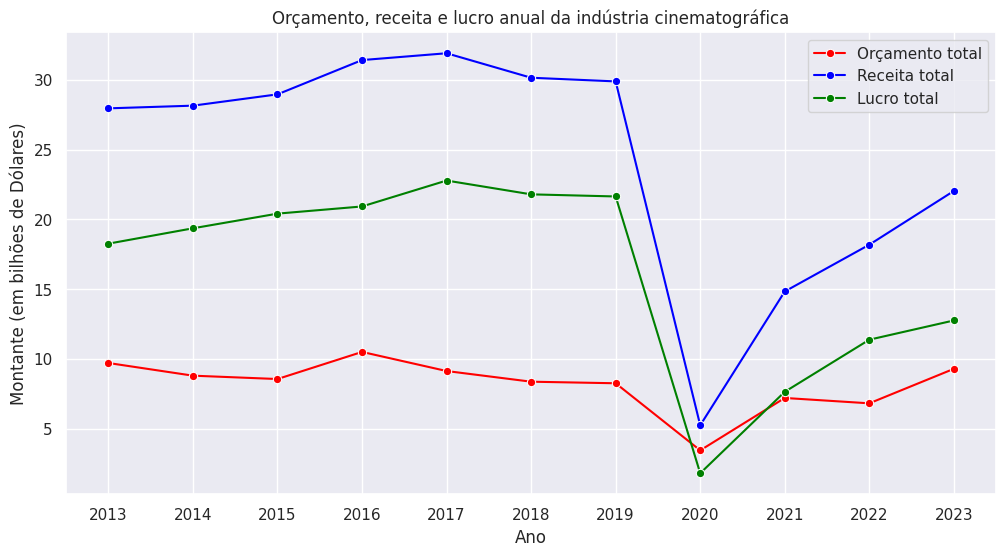

In [206]:
#Evolução anual do investimento dos filmes

totals = []

for year in range(start_year, end_year+1):
    billion = 1000000000
    df = movies_data_by_year[year]
    total_budget = df['budget'].sum() / billion
    total_revenue = df['revenue'].sum() / billion
    total_profit = total_revenue - total_budget
    totals.append({'year': year, 'total_budget': total_budget, 'total_revenue': total_revenue, 'total_profit': total_profit})
    
financial_totals = pd.DataFrame(totals)

# Crie o line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=financial_totals, x='year', y='total_budget', marker='o', label='Orçamento total', color='red')
sns.lineplot(data=financial_totals, x='year', y='total_revenue', marker='o', label='Receita total', color='blue')
sns.lineplot(data=financial_totals, x='year', y='total_profit', marker='o', label='Lucro total', color='green')


plt.title('Orçamento, receita e lucro anual da indústria cinematográfica')
plt.xlabel('Ano')
plt.ylabel('Montante (em bilhões de Dólares)')
plt.xticks(financial_totals['year'])  # Mostra todos os anos no eixo x
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()


Sucesso financeiro dos filmes em relação ao gênero

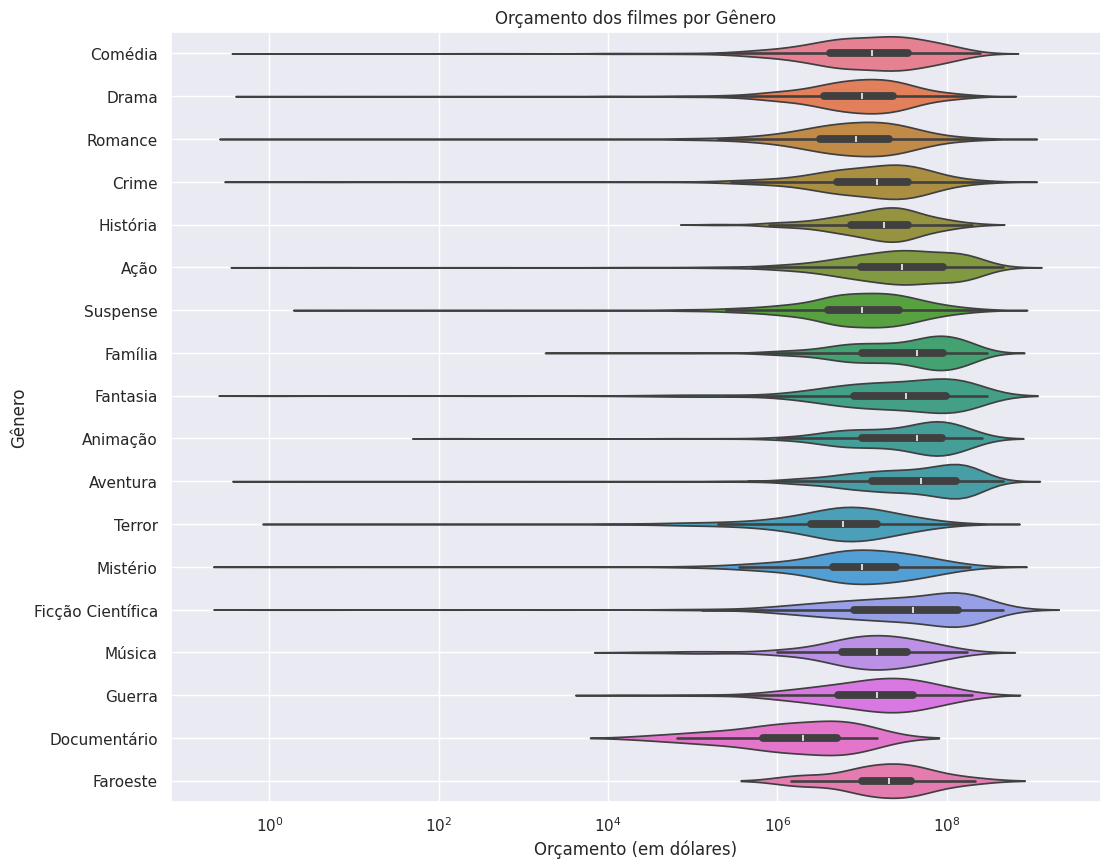

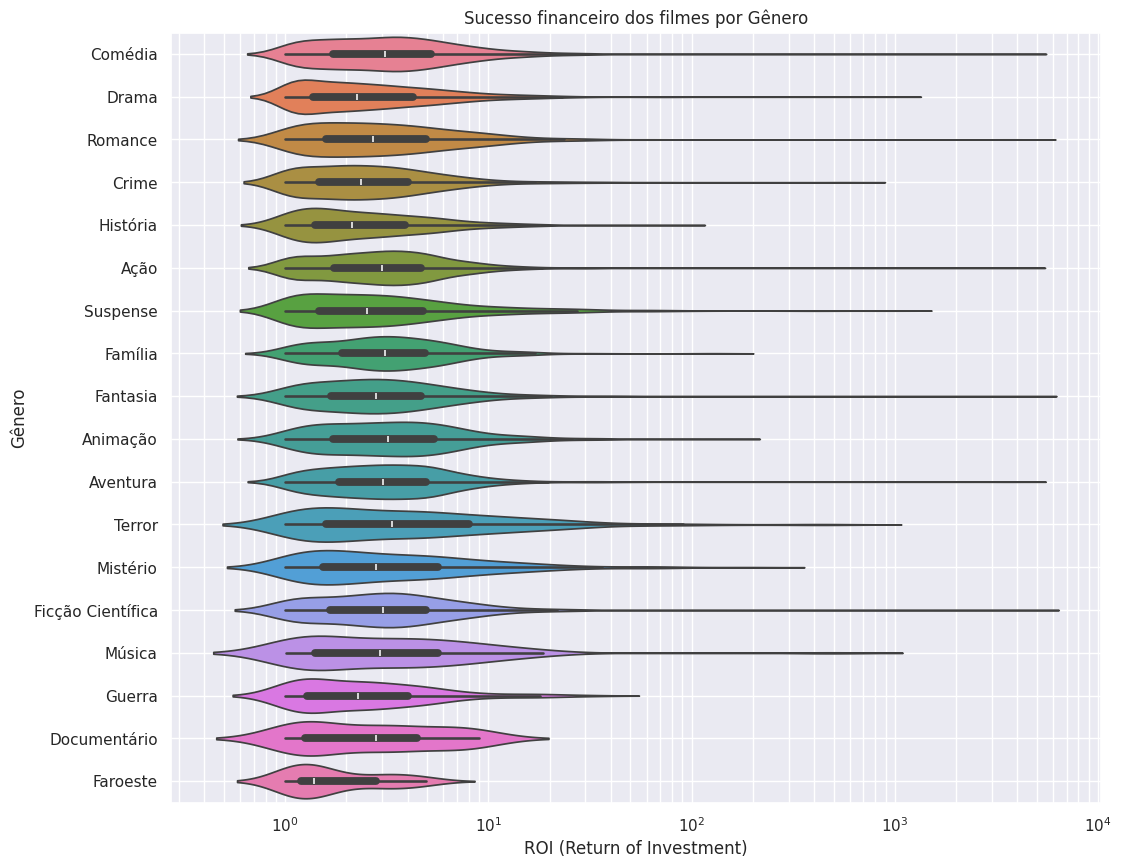

In [207]:
# Violin plot

# df = movies_data_by_year['all']

# df_roi_genres = df.explode('genres', ignore_index=True)

# df_roi_genres['genres']

df_genres_roi = df_genres.copy()
roi = ((df_genres_roi['revenue'] - df_genres_roi['budget']) / df_genres_roi['budget']) + 2
df_genres_roi['roi'] = roi
# df_genres_roi['roi'] = np.log10(df_genres_roi['roi'])

# df_genres_roi.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# df_normalized_translated = df_normalized.copy()
# df_normalized_translated['gender'] = df_normalized['gender'].apply(lambda x:gender_translation[x])

# df_genres_roi.dtypes

# plt.figure(figsize=(10, 10))
# sns.histplot(data=df_genres_roi, y='genres', discrete=True, shrink=0.9)
# plt.title('Histograma de Gêneros dos Filmes')
# plt.xlabel('Frequência Absoluta')
# plt.ylabel('Gênero')
# plt.xticks(rotation=45)
# plt.show()

df_genres_roi = df_genres_roi[df_genres_roi.genres != 'Filme para TV']


plt.figure(figsize=(12, 10))
sns.violinplot(data=df_genres_roi, x='budget', y='genres', hue='genres', log_scale=True)
plt.title('Orçamento dos filmes por Gênero')
plt.xlabel('Orçamento (em dólares)')
plt.ylabel('Gênero')
plt.grid(True, which='both', axis='both')


plt.figure(figsize=(12, 10))
sns.violinplot(data=df_genres_roi, x='roi', y='genres', hue='genres', log_scale=True)
plt.title('Sucesso financeiro dos filmes por Gênero')
plt.xlabel('ROI (Return of Investment)')
plt.ylabel('Gênero')
plt.grid(True, which='both', axis='both')

# stats = df_genres_roi.groupby('genres')['roi'].describe()
# for genre in stats.index:
#     median = stats.loc[genre, '50%']
#     q1 = stats.loc[genre, '25%']
#     q3 = stats.loc[genre, '75%']
#     minimum = stats.loc[genre, 'min']
#     maximum = stats.loc[genre, 'max']
    
#     print(genre, q1, median, q3, minimum, maximum)
    
#     # Encontrar a posição no eixo x para anotar os valores
#     x_pos = df_genres_roi['genres'].unique().tolist().index(genre)
    
#     # Adicionar as anotações ao gráfico
#     plt.text(x_pos, median, f'Mediana: {median:.2f}', horizontalalignment='left', color='black')
#     plt.text(x_pos, q1, f'1Q: {q1:.2f}', horizontalalignment='left', color='blue')
#     plt.text(x_pos, q3, f'3Q: {q3:.2f}', horizontalalignment='left', color='blue')
#     plt.text(x_pos, minimum, f'Min: {minimum:.2f}', horizontalalignment='left', color='red')
#     plt.text(x_pos, maximum, f'Max: {maximum:.2f}', horizontalalignment='left', color='red')


# df_genres_roi[df_genres_roi['roi'] > 3000]

# df[df['roi'] == 0]
plt.show()



Sucesso financeiro dos filmes em relação a coleções

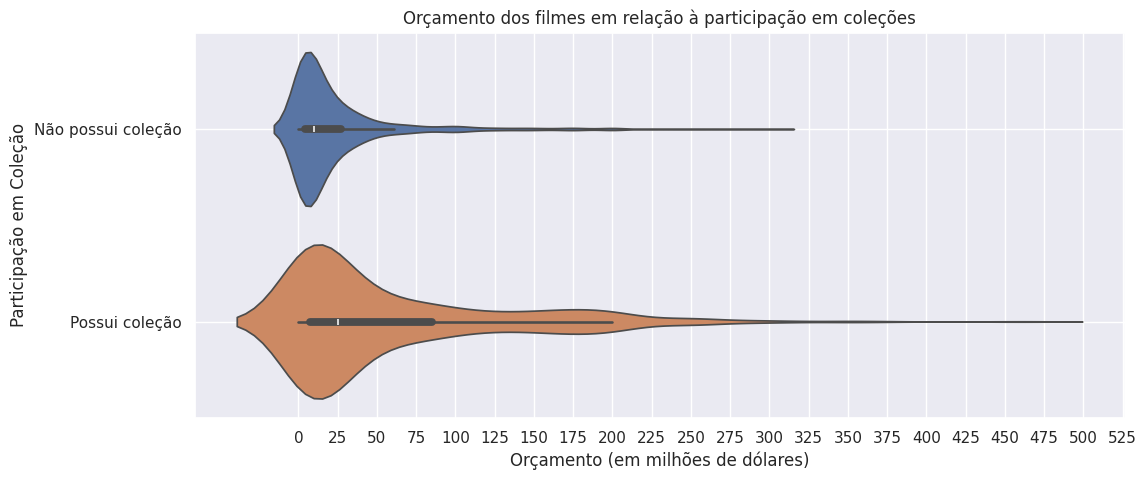

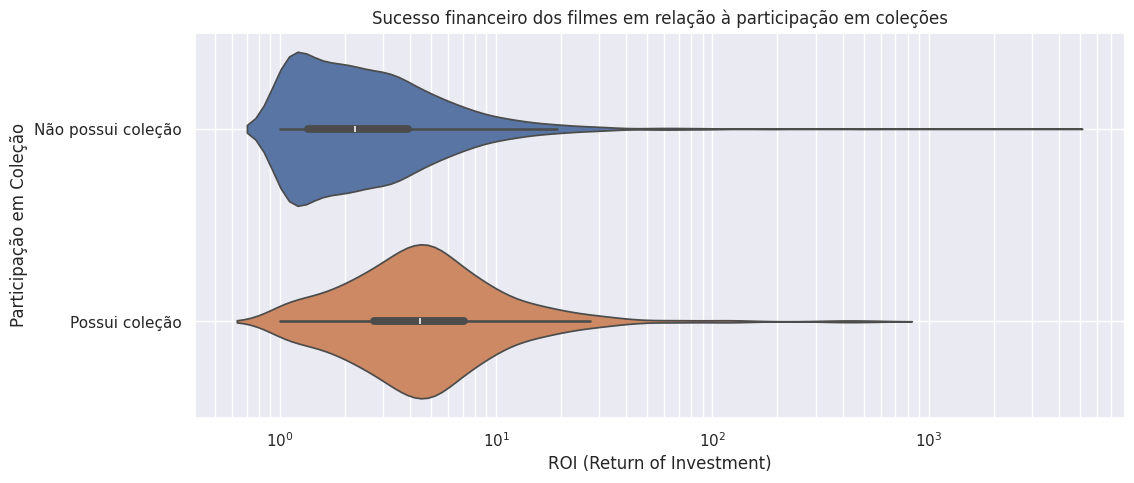

In [209]:
df = movies_data_by_year['all']

df['belongs_to_collection'] = df['belongs_to_collection'].fillna(False).apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['in_collection'] = df['belongs_to_collection'].apply(lambda x: 'Possui coleção' if x else 'Não possui coleção')
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])

df[['roi', 'in_collection']]
million = 1000000

plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x=df['budget']/million, y='in_collection', hue='in_collection')
plt.title('Orçamento dos filmes em relação à participação em coleções')
plt.xlabel('Orçamento (em milhões de dólares)')
plt.ylabel('Participação em Coleção')
plt.grid(True, which='both', axis='both')
plt.xticks(range(0, 550, 25))

plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x=df['roi'] + 2, y='in_collection', hue='in_collection', log_scale=True)
plt.title('Sucesso financeiro dos filmes em relação à participação em coleções')
plt.xlabel('ROI (Return of Investment)')
plt.ylabel('Participação em Coleção')
plt.grid(True, which='both', axis='both')
# plt.xticks(range(-1, 30, 1))



Sucesso financeiro por companhias produtoras

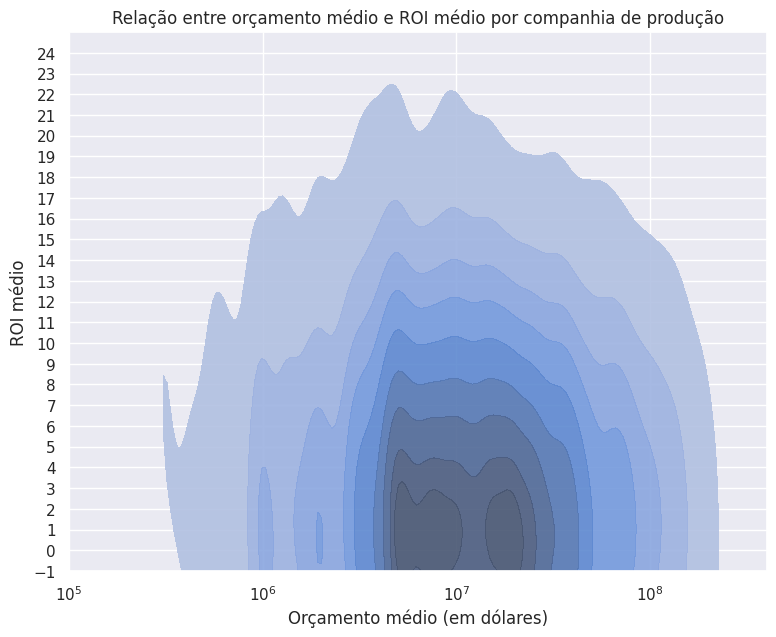

In [262]:
df = movies_data_by_year['all']
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])
df_exploded = df.explode('production_companies')
df_exploded['company_name'] = df_exploded['production_companies'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# df_exploded = pd.concat([df_exploded.drop(['production_companies'], axis=1), df_exploded['production_companies'].apply(pd.Series)], axis=1)

company_stats = df_exploded.groupby('company_name').agg(
    avg_budget=('budget', 'mean'),
    avg_roi=('roi', 'mean'),
).reset_index()

# df_top_companies
# df_exploded['company_name'] = df['production_companies'].apply(lambda x: x.name)

# plt.figure(figsize=(12, 8))
# scatter_plot = sns.scatterplot(
#     data=company_stats,
#     x='avg_budget',
#     y='avg_roi',
#     size='num_films',  
#     sizes=(20, 200),
#     alpha=0.6,
#     hue="num_films",
# )

# plt.yscale('log')
# plt.xscale('log')
# plt.show()


plt.figure(figsize=(9, 7))
plt.yticks(range(-1, 25, 1))
sns.kdeplot(
    data=company_stats,
    x='avg_budget',
    y='avg_roi',
    fill=True,
    alpha=0.9,
    log_scale=[True, False],
    clip=((5, 9), (-1, 25)),
    bw_adjust=.3
)

plt.xlabel('Orçamento médio (em dólares)')
plt.ylabel('ROI médio')
plt.title('Relação entre orçamento médio e ROI médio por companhia de produção')
plt.show()




Sucesso financeiro por países produtores

In [289]:
df = movies_data_by_year["all"]

df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])
df_countries = df.explode('production_countries', ignore_index=True)
df_countries['production_countries'].replace(country_mapping)

country_stats = df_countries.groupby('production_countries').agg(
    avg_budget=('budget', 'mean'),
    avg_roi=('roi', 'mean'),
).reset_index()

# country_stats['avg_budget'] = np.log10(country_stats['avg_budget'])
country_stats['avg_roi'] = np.log10(country_stats['avg_roi'] + 2)


### Budget

m = folium.Map(location=[45, -90], zoom_start=1.5)

Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=country_stats,
    columns=['production_countries', 'avg_budget'],
    key_on='feature.properties.production_country',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Orçamento médio em dólares',
).add_to(m)

folium.LayerControl().add_to(m)

m.save(f'choropleth/choropleth_budget.html')


### ROI

m = folium.Map(location=[45, -90], zoom_start=1.5)

Choropleth(
    geo_data=geo_json_data,
    name='choropleth',
    data=country_stats,
    columns=['production_countries', 'avg_roi'],
    key_on='feature.properties.production_country',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Log10(ROI médio)',
).add_to(m)

folium.LayerControl().add_to(m)

m.save(f'choropleth/choropleth_roi.html')
m


Sucesso financeiro por duração do filme

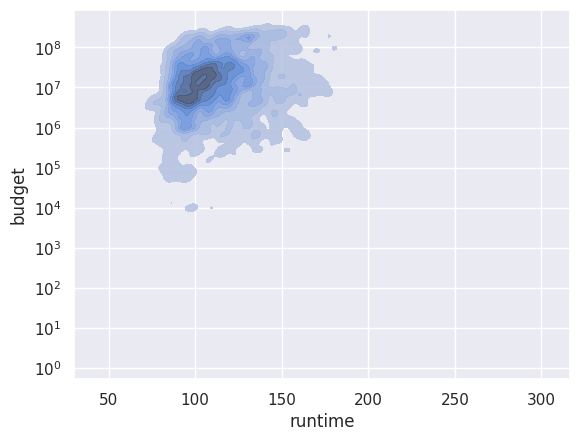

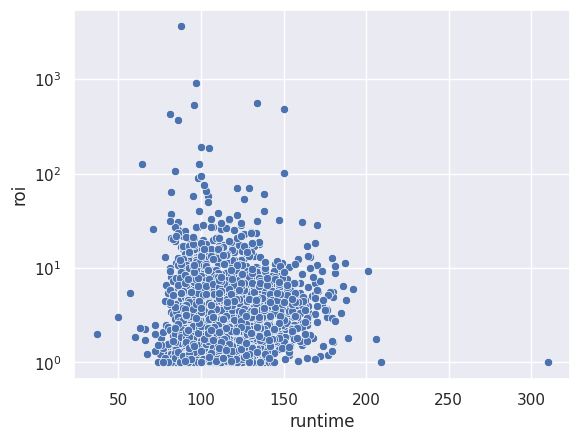

In [304]:
df = movies_data_by_year["all"]
df['roi'] = ((df['revenue'] - df['budget']) / df['budget']) + 2


# sns.scatterplot(
#     data=df,
#     x='runtime',
#     y='budget',
# )

sns.kdeplot(
    data=df,
    x='runtime',
    y='budget',
    fill=True,
    alpha=0.9,
    log_scale=[False, True],
    # clip=((5, 9), (-1, 25)),
    bw_adjust=.4
)

plt.show()

ax = sns.scatterplot(
    data=df,
    x='runtime',
    y='roi',
    # fill=True,
    # alpha=0.9,
    # log_scale=[False, True],
    # clip=((5, 9), (-1, 25)),
)

ax.set_yscale('log')

plt.show()



Regressão linear

/tmp/ipykernel_12801/3606699203.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['budget'] = np.log(X['budget'])


Intercept: 110.43401399036219
Coefficients: [ 8.96039765e-01 -8.32667268e-16  3.14205803e-01 -5.53379977e-02
  2.36124253e-02  2.09841965e-01  1.70747410e-01  3.71294460e-01
  4.96457625e-01 -2.37477945e-01 -7.99363422e-02 -3.66278014e-01
  1.22605959e-01  8.78370986e-02 -1.91941111e-01  5.32804185e-01
  1.83930453e-01  1.00833297e-01  5.68715662e-02 -1.35466257e-01
  8.64457276e-03 -7.83869196e-02 -1.47438678e+00  1.11778066e-01]
R² Score: 0.631616289528478
Mean Squared Error: 3.112313403188776
Adjusted R² Score: 0.6283919244477645


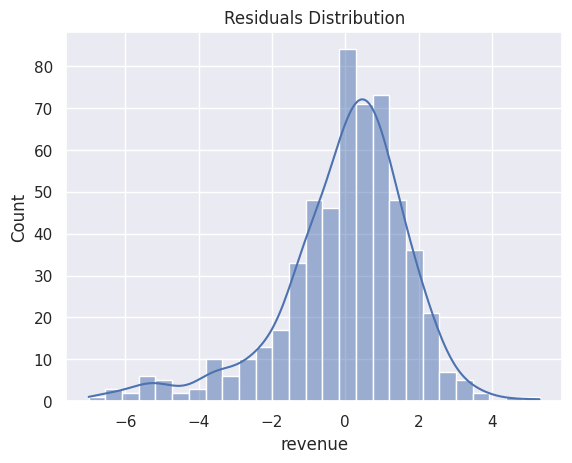

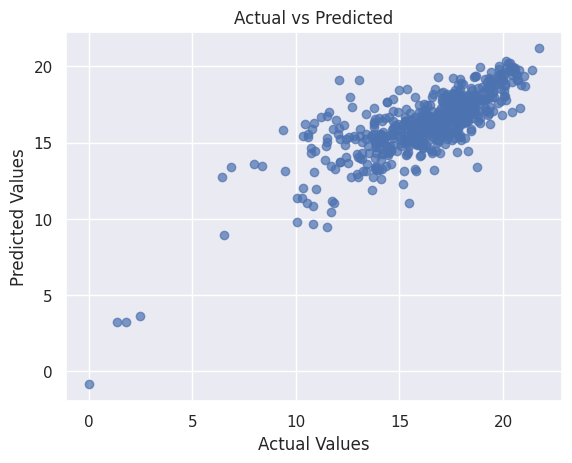

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = movies_data_by_year["all"]
df['roi'] = ((df['revenue'] - df['budget']) / df['budget'])

df['belongs_to_collection'] =  df['belongs_to_collection'].apply(lambda x: 1 if x else 0)
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df = pd.get_dummies(df, columns=['original_language'], drop_first=True)

## Dummies de genero
df_exploded = df.explode('genres')
dummies = pd.get_dummies(df_exploded['genres'], prefix='genre')
dummies_grouped = dummies.groupby(df_exploded['original_title']).sum()


df_original = df.drop(columns=['genres'])
df_original = df_original.drop_duplicates(subset='original_title')
df_final = df_original.merge(dummies_grouped, on='original_title', how='left')


## Dummies de companies
# df_exploded = df.explode('production_companies')
# dummies = pd.get_dummies(df_exploded['production_companies'], prefix='production_companies')
# dummies_grouped = dummies.groupby(df_exploded['original_title']).sum()


# df_original = df.drop(columns=['genres'])
# df_original = df_original.drop_duplicates(subset='original_title')
# df_final = df_original.merge(dummies_grouped, on='original_title', how='left')


# filtered_df = df[df['budget'] > threshold]




X = df_final[['budget', 'belongs_to_collection', 'original_language_en', 'year', 'runtime', 'genre_Action', 'genre_Adventure', 'genre_Animation', 
    'genre_Comedy', 'genre_Crime', 'genre_Documentary', 
    'genre_Drama', 'genre_Family', 'genre_Fantasy', 
    'genre_History', 'genre_Horror', 'genre_Music', 
    'genre_Mystery', 'genre_Romance', 'genre_Science Fiction', 
    'genre_Thriller', 'genre_War', 
    'genre_Western', 'original_language_es']]
y = np.log(df_final['revenue'])
X['budget'] = np.log(X['budget'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R² Score:", adjusted_r2)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# roi_pred = ((np.exp(y_pred) - np.exp(X_test['budget'])) / np.exp(X_test['budget']))
# roi_real = ((np.exp(y_test) - np.exp(X_test['budget'])) / np.exp(X_test['budget']))

# mse_roi = mean_squared_error(roi_real, roi_pred)
# r2_roi = r2_score(roi_real, roi_pred)
# print("Mean Squared Error (ROI):", mse_roi)
# print("R² (ROI):", r2_roi)

# plt.scatter(roi_real, roi_pred, alpha=0.7)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs Predicted - ROI")
# plt.show()

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

df = movies_data_by_year["all"]

df_evaluated = df.copy().drop_duplicates().reset_index()

df_evaluated['roi'] = ((df_evaluated['revenue'] - df_evaluated['budget']) / df_evaluated['budget'])

dummie_variables = ['cast', 'crew', 'original_language', 'belongs_to_collection', 'production_companies', 'genres', 'keywords', 'production_countries', 'spoken_languages']

dummie_to_ignore_eval = ['original_language'] # Dummies que são string
dummie_variables_threshold = {
    'production_companies': {
        'name': 20
    },
    'cast': {
        'name': 15,
        'gender': 0,
    },
    'crew': {
        'name': 15,
        'gender': 0
    },
    'keywords': {
        'value': 40,
    },
    'spoken_languages': {
        'value': 20
    },
    'production_countries': {
        'value': 20,
    },
}

for dummie in dummie_variables:
    if not dummie in dummie_to_ignore_eval:
        df_evaluated[dummie] = df_evaluated[dummie].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_evaluated['belongs_to_collection'] = df_evaluated['belongs_to_collection'].notna().astype(int)

processed_dummies = []

for dummie in dummie_variables:
    df_explode = df_evaluated.explode(dummie)
    
    if dummie in dummie_variables_threshold:
        variable_threshold = dummie_variables_threshold[dummie]
        
        for field_name, threshold in variable_threshold.items():
            field_col = f'{dummie}_{field_name}'
            df_explode[field_col] = df_explode[dummie].apply(lambda x: x[field_name] if isinstance(x, dict) else x)
            dummie_counts = df_explode[field_col].value_counts().to_dict()
            
            df_explode[field_col] = df_explode[field_col].apply(lambda x: x if x in dummie_counts and dummie_counts[x] > threshold else 'Other')
            
            dummie_df = pd.get_dummies(df_explode[field_col], drop_first=True, prefix=field_col)
            dummie_grouped = dummie_df.groupby(df_evaluated['id']).sum()
            processed_dummies.append(dummie_grouped)

numerical_columns = df[['id', 'budget', 'revenue', 'year', 'runtime']].set_index('id')

df_final = processed_dummies[0]

for i in range(1, len(processed_dummies)):
    df_final = df_final.merge(processed_dummies[i], on="id")
    
df_final = df_final.merge(numerical_columns, on="id")
    
y = np.log(df_final['revenue'])
df_final_without_revenue = df_final.drop('revenue', axis=1)
df_final_without_revenue['budget'] = np.log(df_final_without_revenue['budget'])

X = df_final_without_revenue

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Previsão utilizando budget com OLS (Ordinary Least Squares) e p-value pra teste de Homogeneidade de Variância

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2010.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.99e-302
Time:                        14:40:10   Log-Likelihood:                -4075.3
No. Observations:                1955   AIC:                             8155.
Df Residuals:                    1953   BIC:                             8166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.362      0.415      0.6

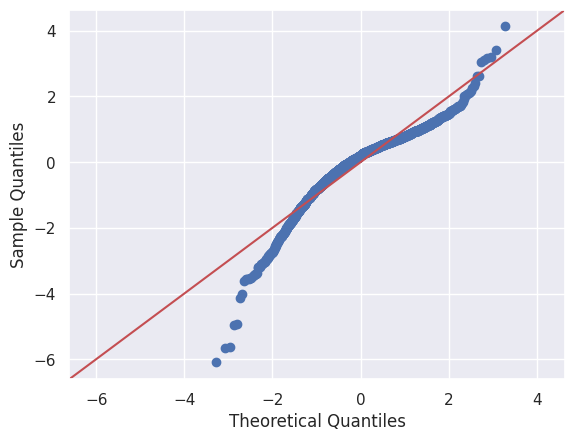

In [6]:
from statsmodels.compat import lzip

# Use PCA-transformed components as predictors
X_train_with_const = sm.add_constant(X_train['budget'])  # Add a constant for the intercept
X_test_with_const = sm.add_constant(X_test['budget'])

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

y_pred_sm = model_ols_sm.predict(X_test_with_const)
residuals_sm = y_test - y_pred_sm

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.show()

# Previsão utilizando as dummie com OLS

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     3.433
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.66e-77
Time:                        14:40:24   Log-Likelihood:                -3267.8
No. Observations:                1955   AIC:                             8548.
Df Residuals:                     949   BIC:                         1.416e+04
Df Model:                        1005                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

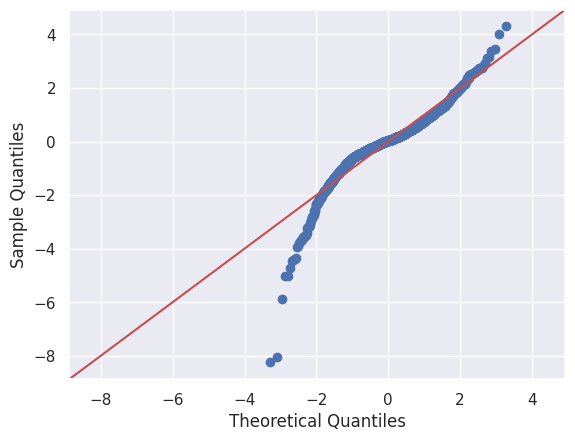

In [7]:
from statsmodels.compat import lzip


# Use PCA-transformed components as predictors
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

# Teste de Heteroskedasticity Breush-Pagan test:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

y_pred_sm = model_ols_sm.predict(X_test_with_const)
residuals_sm = y_test - y_pred_sm

sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.show()

# Análise de componentes principais pra resolver multicolinearidade

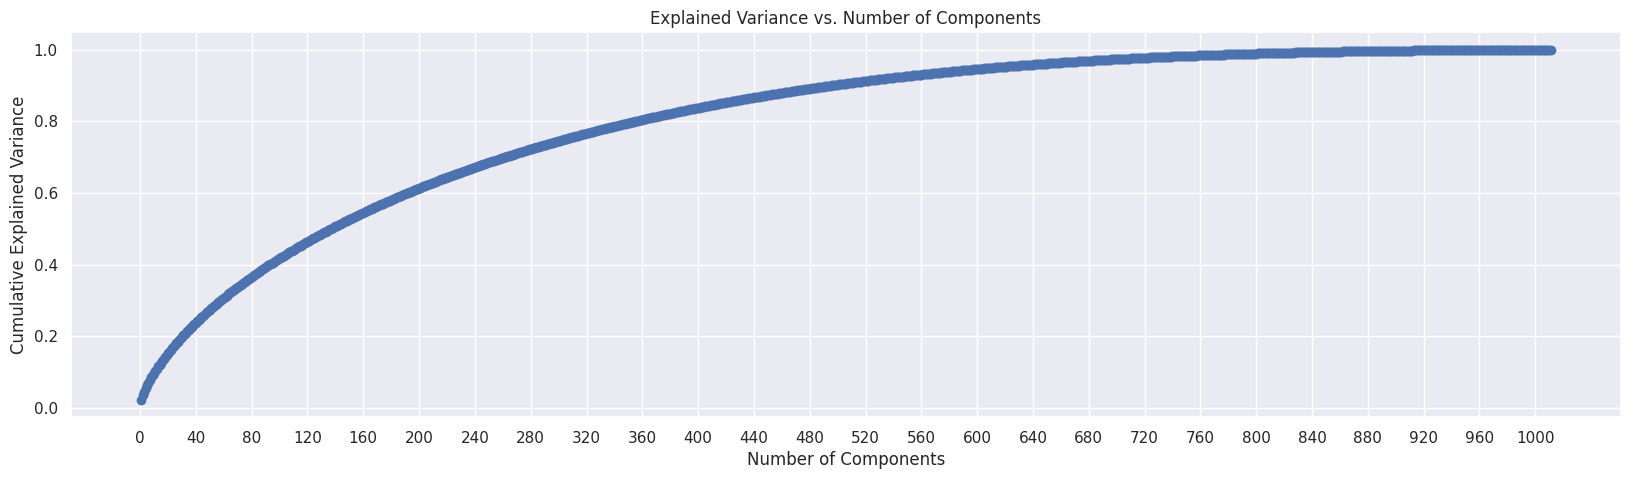

In [36]:
## Gráfico de componentes principais x Variancia

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train)

pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_standardized)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(20, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.xticks(range(0, len(cumulative_variance) + 1, 40))
plt.show()


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     4.952
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          2.44e-152
Time:                        09:51:27   Log-Likelihood:                -3954.9
No. Observations:                2234   AIC:                             9512.
Df Residuals:                    1433   BIC:                         1.409e+04
Df Model:                         800                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2692      0.038    433.399      0.0

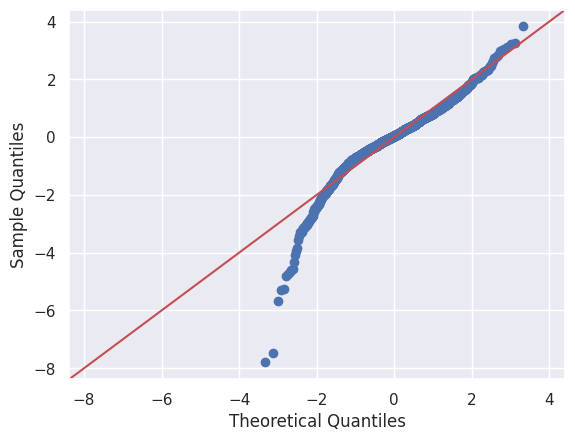

[17.38306146 20.56165187 17.856115   15.49153431 21.08849049 16.26019937
 20.09872895 20.40759854 16.75967801 17.02605188 13.59613327 16.41475758
 18.69515077 13.65489787 17.14181016 15.44091095 16.86065237 15.09855514
 15.29147463 12.97237376  9.59406154 17.01086003 15.4974415  21.15462978
 15.50958146  6.1857385  15.93265498 17.46427057 16.06961975 13.66754193
 17.55958604 16.63871663 13.73931062 18.53913113 16.09980045 15.47397333
 19.86027286 16.29777884 15.16151745 14.83940853 20.23838207 14.01657146
 15.5372635  15.97670542 13.5846102  18.81085948 14.07392062 15.4408092
 19.50110122 14.9472459  16.83615117 16.09783767 14.186462   19.38883208
 15.67262898 18.12141625 13.31327805 15.00920894 10.8282012  24.3751059
 15.34785272 16.95987978 13.33554909 15.59528131 16.82063147 15.63441908
 17.59765319 21.03730653 19.43509251 17.4038258  15.40902504 16.93172522
 14.56530012 20.54752804 14.55020438 16.68004475 17.32407129 18.42843123
 14.47250167 24.37432485 19.24238569 12.3644503  14.4

In [37]:
from statsmodels.compat import lzip

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data
X_test_scaled = scaler.transform(X_test)       # Transform test data

pca = PCA(n_components=800)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit PCA on scaled training data
X_test_pca = pca.transform(X_test_scaled)        # Transform scaled test data

# Use PCA-transformed components as predictors
X_train_with_const = sm.add_constant(X_train_pca)
X_test_with_const = sm.add_constant(X_test_pca)

# Fit the model using statsmodels
model_ols_sm = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary with p-values
print(model_ols_sm.summary())

# Teste de Heteroskedasticity Breush-Pagan test:
name = ["Lagrange multiplier statistic - Heteroscedasticidade", "p-value", "f-value", "f p-value"]
test = het_breuschpagan(model_ols_sm.resid, model_ols_sm.model.exog)
print(lzip(name, test))

name = ["Multicollinearity Condition Number"]
test = [np.linalg.cond(model_ols_sm.model.exog)]
print(lzip(name, test))

y_pred_sm = model_ols_sm.predict(X_test_with_const)
residuals_sm = y_test - y_pred_sm

sm.qqplot(model_ols_sm.resid, line='45', fit=True)
plt.show()

print(y_pred_sm)

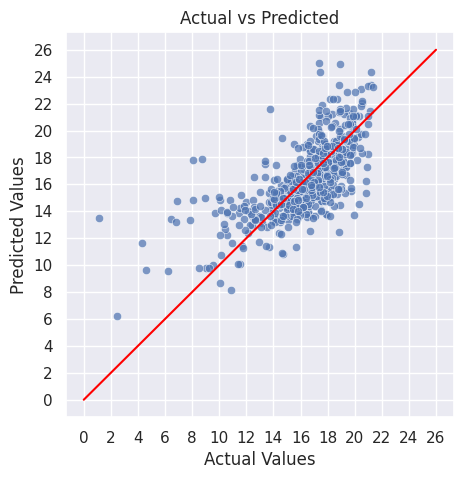

In [38]:
# roi_pred = np.log((np.exp(y_pred_sm) - np.exp(X_test['budget'])) / np.exp(X_test['budget']) + 2)
# roi_real = np.log((np.exp(y_test) - np.exp(X_test['budget'])) / np.exp(X_test['budget']) + 2)

# mse_roi = mean_squared_error(roi_real, roi_pred)
# r2_roi = r2_score(roi_real, roi_pred)
# print("Mean Squared Error (ROI):", mse_roi)
# print("R² (ROI):", r2_roi)

plt.figure(figsize=(5, 5))


ax = sns.scatterplot(y=y_pred_sm, x=y_test, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

plt.xticks(range(0, 28, 2))
plt.yticks(range(0, 28, 2))

x = np.linspace(*ax.get_xlim())
sns.lineplot(y=x, x=x, color='red')
plt.show()

In [50]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

model = LinearRegression()

# model.fit(X_train_pca, y_train)

# train_pred  = model.predict(X_train_pca)
# r2_score(y_train , train_pred)


# Configurando o KFold
kf = KFold(n_splits=40, shuffle=True, random_state=12)

# Definindo as métricas
scoring = {
    'r2': 'r2',  # R²
    'rmse': 'neg_root_mean_squared_error',  # RMSE
    'mae': 'neg_mean_absolute_error',  # MAE (em valores negativos, por padrão)
}

# Avaliação com cross_validate
scores = cross_validate(model, X_train_pca, y_train, cv=kf, scoring=scoring, return_train_score=True)

all_r2 = scores['test_r2']

# Resultados
print("R² por fold:", scores['test_r2'])
print("R² médio:", scores['test_r2'].mean())

print("RMSE por fold:", scores['test_rmse'])
print("RMSE médio:", scores['test_rmse'].mean())

print("MAE por fold (negativo):", scores['test_mae'])  # Valores negativos
print("MAE médio:", -scores['test_mae'].mean())  # Transformar para valores positivos

print(r2_score(y_pred_sm, y_test))

all_r2_adjusted = 1 - (1-all_r2)*(len(y_train)-1)/(len(y)-X_train_pca.shape[1]-1)

print("R² ajustado por fold:", all_r2_adjusted)
print("R² ajustado médio:", all_r2_adjusted.mean())

# adjusted_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y)-X_train_pca.shape[1]-1)


R² por fold: [ 0.15862301  0.16583154  0.53922874  0.41410282  0.17056437  0.17838283
  0.26880953  0.52095938  0.4868464   0.27074535  0.4630802   0.20481338
 -0.03074455  0.06069797  0.04517422  0.39981095  0.21070346  0.12604811
  0.27673964 -0.23184914  0.28806218  0.18903462  0.29836069  0.21298876
  0.44283633  0.22848246  0.59910946  0.34378216  0.32490832  0.32035141
  0.17977511  0.39877619  0.15761599  0.30790621  0.50723313  0.48088967
  0.31624309  0.39326073  0.0143552   0.15086002]
R² médio: 0.271334998453167
RMSE por fold: [-2.43337816 -2.21422133 -2.24606207 -2.67369008 -2.19534164 -2.48327964
 -1.8099246  -2.51688766 -1.83879152 -1.97652573 -1.78580972 -2.88230639
 -2.39153043 -2.35406153 -2.72930972 -2.72912646 -2.02326748 -2.50816707
 -2.72156542 -2.69177426 -2.49489211 -2.61527026 -1.92872572 -2.31027758
 -1.67671277 -1.98625766 -1.93853811 -2.44316138 -2.42420879 -1.96630301
 -2.01578449 -1.84665971 -2.44131828 -2.15473975 -2.27273256 -2.069618
 -2.02606381 -2.0985